# Data Mining - Computer Assignment #2

## Sina Negarandeh - SID: 810197640

## Prerequisites

Before anything we import libraries needed in this assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# For extracting frequent itemsets and for association rule mining
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules

We store the address of each dataset in a variable to maintain a clean code.

In [2]:
MOVIES_DATA_PATH = 'data/movies.csv'
RATINGS_DATA_PATH = 'data/ratings.csv'

In [3]:
movies_df = pd.read_csv(MOVIES_DATA_PATH)
ratings_df = pd.read_csv(RATINGS_DATA_PATH)

### Question 1

We use the `head` method to get the first five rows of each dataframe to get a general idea of each column and its values.

In [4]:
movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [5]:
ratings_df.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Here, we use `info` method to get a general information about the dataframe including the index dtype and columns, non-null values and memory usage.

In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [7]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


We could also use `isna` method to check whether the dataframe contains any missing values or not. And then to take the corresponding action accordingly.

In [8]:
movies_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [9]:
ratings_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

A closer look at both dataframes reveals that they have no missing values. However, some titles lack the release year of the movie, and some movies have `(no genres listed)` instead of specific genres. These issues do not affect our process, so we can ignore them. Below are some examples.

In [10]:
movies_df[movies_df['genres'].isin(['(no genres listed)'])]

movieId                                              title  \
8517   114335                                  La cravate (1957)   
8684   122888                                     Ben-hur (2016)   
8687   122896  Pirates of the Caribbean: Dead Men Tell No Tal...   
8782   129250                                  Superfast! (2015)   
8836   132084                                Let It Be Me (1995)   
8902   134861               Trevor Noah: African American (2013)   
9033   141131                                   Guardians (2016)   
9053   141866                                  Green Room (2015)   
9070   142456                     The Brand New Testament (2015)   
9091   143410                                         Hyena Road   
9138   147250  The Adventures of Sherlock Holmes and Doctor W...   
9178   149330                          A Cosmic Christmas (1977)   
9217   152037                                 Grease Live (2016)   
9248   155589                             Noin 7 veljestä (1968)   
9259   156605                                           Paterson   
9307   159161                        Ali Wong: Baby Cobra (2016)   
9316   159779                   A Midsummer Night's Dream (2016)   
9348   161008                         The Forbidden Dance (1990)   
9413   165489                              Ethel & Ernest (2016)   
9426   166024                                    Whiplash (2013)   
9448   167570                                             The OA   
9478   169034                                    Lemonade (2016)   
9514   171495                                             Cosmos   
9515   171631                            Maria Bamford: Old Baby   
9518   171749                  Death Note: Desu nôto (2006–2007)   
9525   171891                                  Generation Iron 2   
9534   172497                  T2 3-D: Battle Across Time (1996)   
9541   172591            The Godfather Trilogy: 1972-1990 (1992)   
9562   173535  The Adventures of Sherlock Holmes and Doctor W...   
9573   174403                        The Putin Interviews (2017)   
9611   176601                                       Black Mirror   
9661   181413  Too Funny to Fail: The Life and Death of The D...   
9663   181719  Serving in Silence: The Margarethe Cammermeyer...   
9669   182727                     A Christmas Story Live! (2017)   

                  genres  
8517  (no genres listed)  
8684  (no genres listed)  
8687  (no genres listed)  
8782  (no genres listed)  
8836  (no genres listed)  
8902  (no genres listed)  
9033  (no genres listed)  
9053  (no genres listed)  
9070  (no genres listed)  
9091  (no genres listed)  
9138  (no genres listed)  
9178  (no genres listed)  
9217  (no genres listed)  
9248  (no genres listed)  
9259  (no genres listed)  
9307  (no genres listed)  
9316  (no genres listed)  
9348  (no genres listed)  
9413  (no genres listed)  
9426  (no genres listed)  
9448  (no genres listed)  
9478  (no genres listed)  
9514  (no genres listed)  
9515  (no genres listed)  
9518  (no genres listed)  
9525  (no genres listed)  
9534  (no genres listed)  
9541  (no genres listed)  
9562  (no genres listed)  
9573  (no genres listed)  
9611  (no genres listed)  
9661  (no genres listed)  
9663  (no genres listed)  
9669  (no genres listed)

In order to get a descriptive statistics information of our dataframe we use `describe` method.

In [11]:
movies_df.describe()

movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000

In [12]:
ratings_df.describe()

userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09

As mentioned in the assignment, we need to filter out movies that have too few ratings. To determine the threshold for the minimum number of ratings, we first need to count how many ratings each movie has. We can do this by using the `groupby` method on the `movieId` column, which contains the id of the movie for each rating. Then, we apply the count function to get the number of ratings for each movie (movieId). The results are shown below.

In [13]:
ratings_count_df = ratings_df[['movieId', 'userId']].groupby(by=["movieId"]).count().reset_index()
ratings_count_df

movieId  userId
0           1     215
1           2     110
2           3      52
3           4       7
4           5      49
...       ...     ...
9719   193581       1
9720   193583       1
9721   193585       1
9722   193587       1
9723   193609       1

[9724 rows x 2 columns]

Again to get a descriptive statistics information of our dataframe to decide the value of our threshold for the minimum number of ratings. we use `describe` method.

In [44]:
ratings_count_df.describe()

movieId       userId
count    9724.000000  9724.000000
mean    42245.024373    10.369807
std     52191.137320    22.401005
min         1.000000     1.000000
25%      3245.500000     1.000000
50%      7300.000000     3.000000
75%     76739.250000     9.000000
max    193609.000000   329.000000

Based on the statistical information and expermints we find the `3` as a reasonable value for minimum number of ratings. As a result, we filter our ratings.

In [14]:
rated_movies_df = ratings_count_df[ratings_count_df['userId'] > 3]
rated_movies_df

movieId  userId
0           1     215
1           2     110
2           3      52
3           4       7
4           5      49
...       ...     ...
9674   184471       4
9681   185029       4
9690   187541       4
9691   187593      12
9692   187595       5

[4180 rows x 2 columns]

The reason for filtering this dataframe is when we want to merge it with movies dataframe, we could simply use join on left (ratings).

In [15]:
filtered_ratings_df = ratings_df[ratings_df['movieId'].isin(rated_movies_df['movieId'])]
filtered_ratings_df

userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100830     610   166528     4.0  1493879365
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352

[92394 rows x 4 columns]

As we can see the number of rows have reduced since some movies are filtered.

In [16]:
filtered_ratings_df.groupby(by=["movieId"]).count().reset_index()

movieId  userId  rating  timestamp
0           1     215     215        215
1           2     110     110        110
2           3      52      52         52
3           4       7       7          7
4           5      49      49         49
...       ...     ...     ...        ...
4175   184471       4       4          4
4176   185029       4       4          4
4177   187541       4       4          4
4178   187593      12      12         12
4179   187595       5       5          5

[4180 rows x 4 columns]

As mentioned in the assignment, we need to merge the two data sets into one. Here, we do that.

In [17]:
ratings_movies_df = pd.merge(filtered_ratings_df, movies_df, on='movieId', how='left')
ratings_movies_df

userId  movieId  rating   timestamp  \
0           1        1     4.0   964982703   
1           1        3     4.0   964981247   
2           1        6     4.0   964982224   
3           1       47     5.0   964983815   
4           1       50     5.0   964982931   
...       ...      ...     ...         ...   
92389     610   166528     4.0  1493879365   
92390     610   166534     4.0  1493848402   
92391     610   168248     5.0  1493850091   
92392     610   168250     5.0  1494273047   
92393     610   168252     5.0  1493846352   

                                     title  \
0                         Toy Story (1995)   
1                  Grumpier Old Men (1995)   
2                              Heat (1995)   
3              Seven (a.k.a. Se7en) (1995)   
4               Usual Suspects, The (1995)   
...                                    ...   
92389  Rogue One: A Star Wars Story (2016)   
92390                         Split (2017)   
92391        John Wick: Chapter Two (2017)   
92392                       Get Out (2017)   
92393                         Logan (2017)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                                   Comedy|Romance  
2                            Action|Crime|Thriller  
3                                 Mystery|Thriller  
4                           Crime|Mystery|Thriller  
...                                            ...  
92389              Action|Adventure|Fantasy|Sci-Fi  
92390                        Drama|Horror|Thriller  
92391                        Action|Crime|Thriller  
92392                                       Horror  
92393                                Action|Sci-Fi  

[92394 rows x 6 columns]

To visualize the number of ratings for each movie, we need to create a bar chart and analyze the results. However, since there are too many movies to fit in one graph, we use two strategies. First, we divide the data into chunks of 100 movies and plot each chunk separately. Second, we only show the top 100 movies with the most ratings.

In [18]:
plot_df = ratings_movies_df.groupby(by="title")['userId'].count().reset_index().sort_values('userId', ascending=False)
plot_df

title  userId
1342                             Forrest Gump (1994)     329
3302                Shawshank Redemption, The (1994)     317
2971                             Pulp Fiction (1994)     307
3337                Silence of the Lambs, The (1991)     279
2351                              Matrix, The (1999)     278
...                                              ...     ...
1799                             Ice Princess (2005)       4
1307                    Flight of the Phoenix (2004)       4
3516                                     Stay (2005)       4
2613                     New York, I Love You (2009)       4
516   Boondock Saints II: All Saints Day, The (2009)       4

[4180 rows x 2 columns]

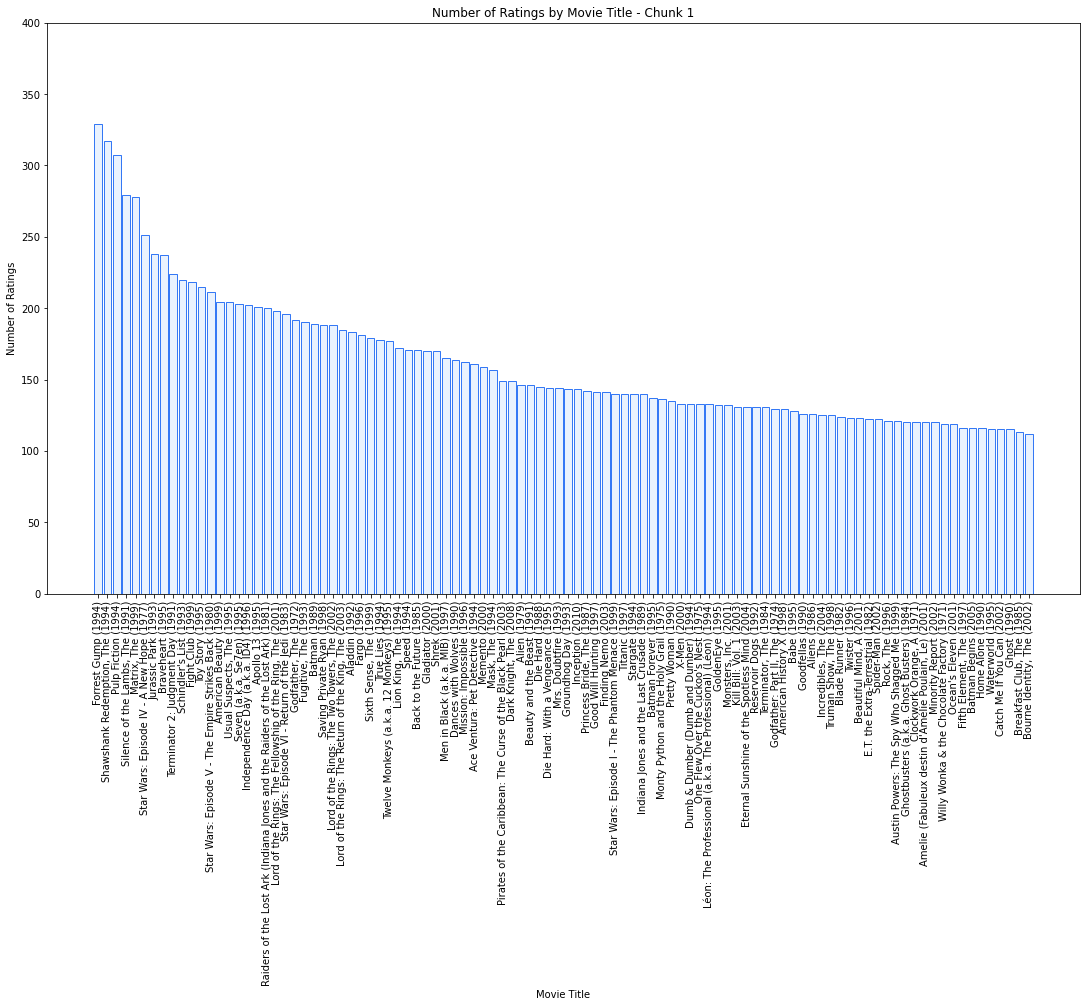

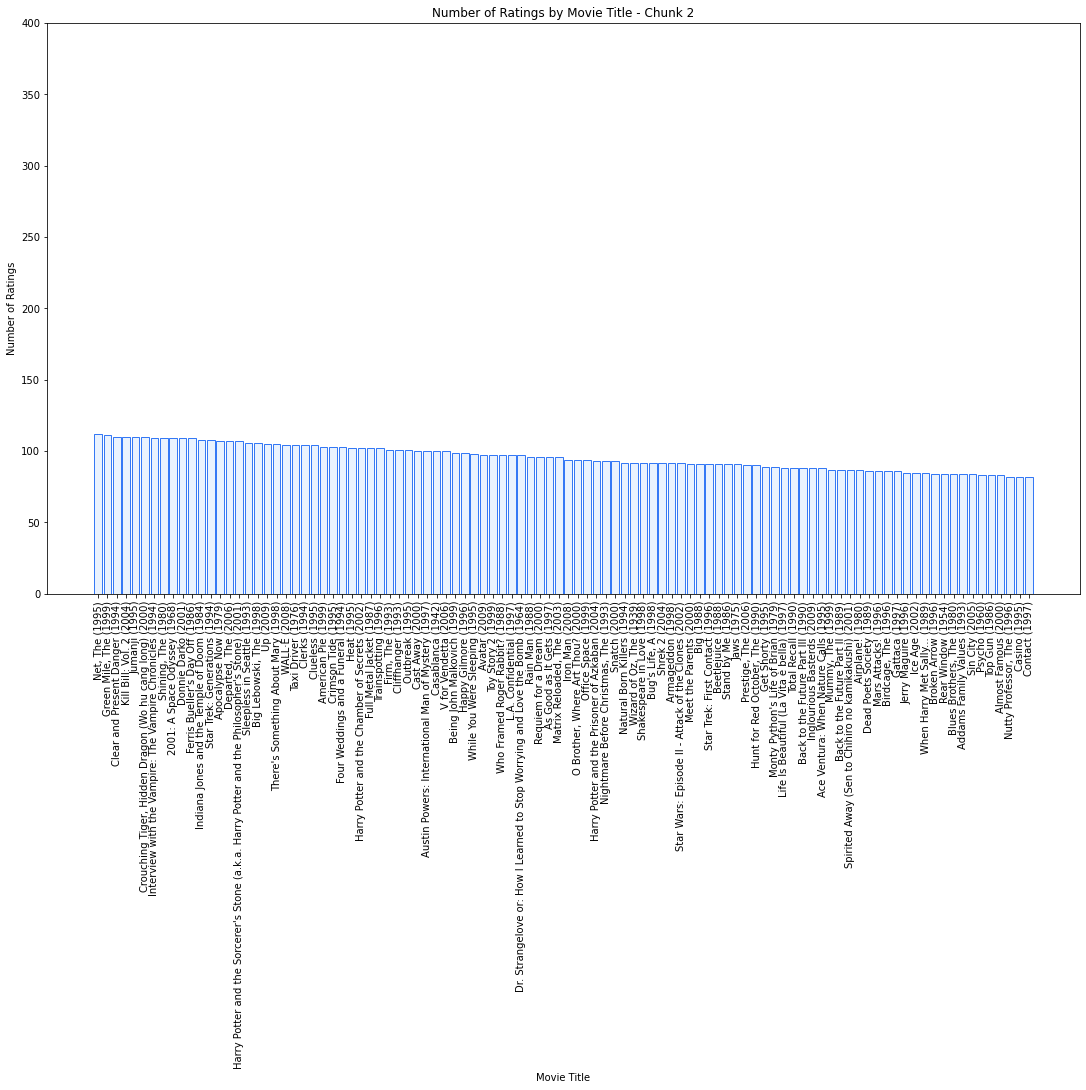

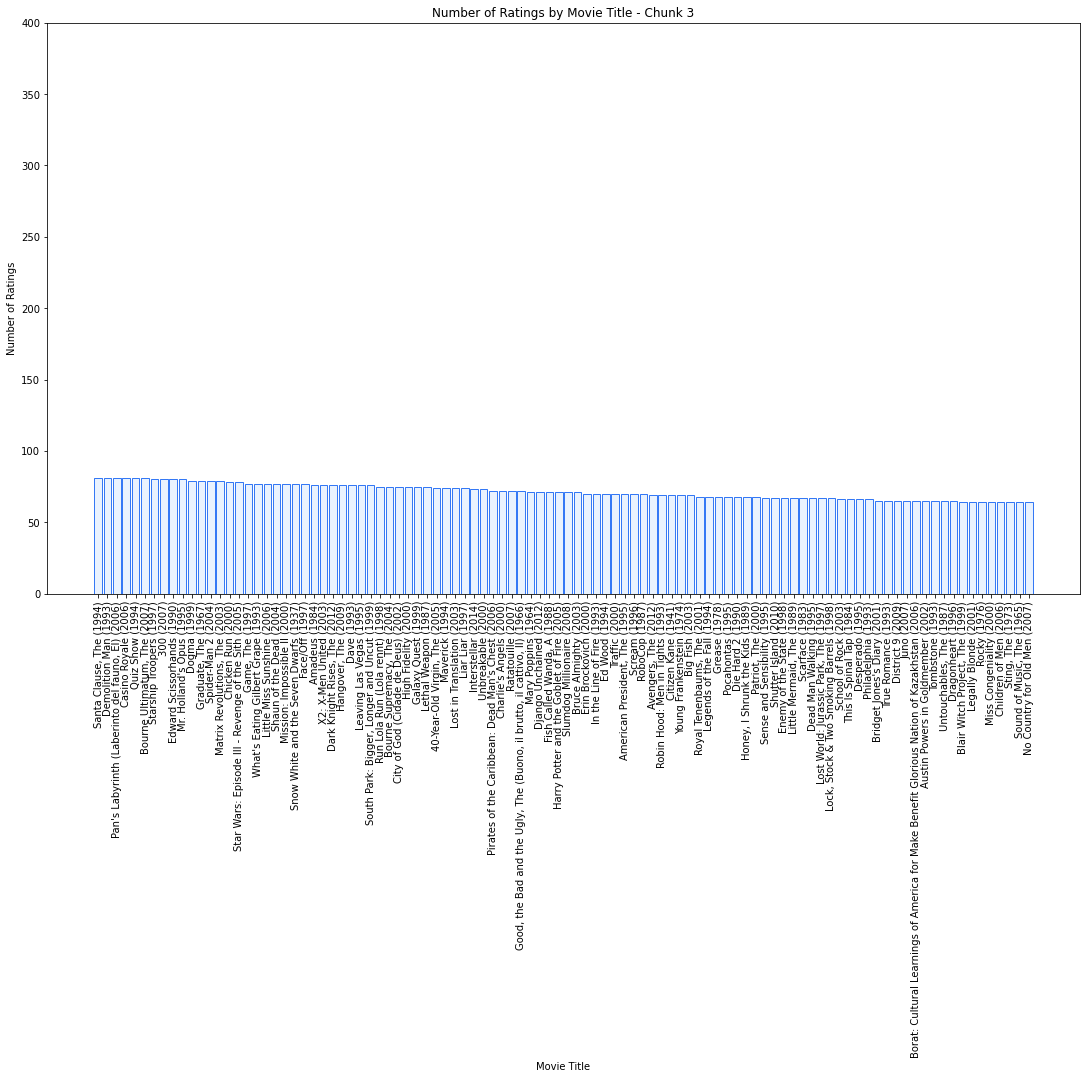

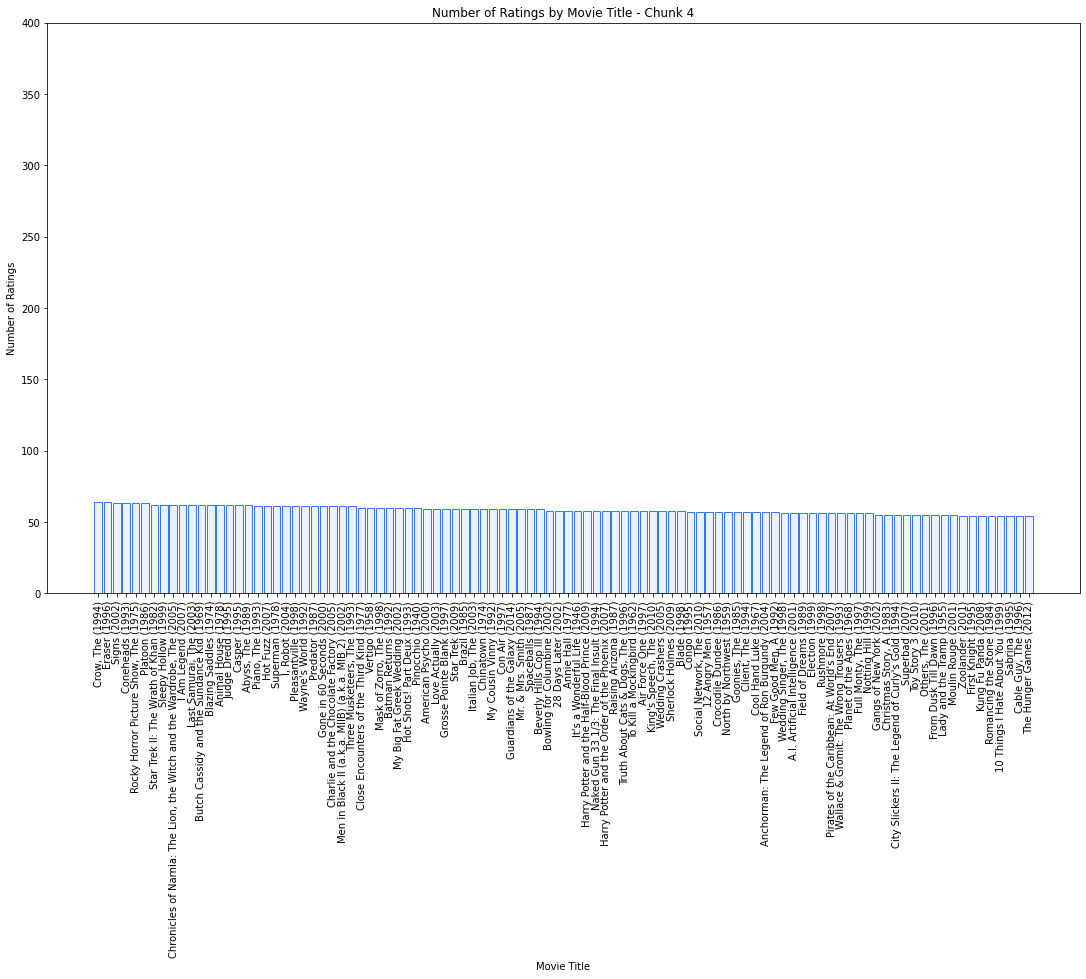

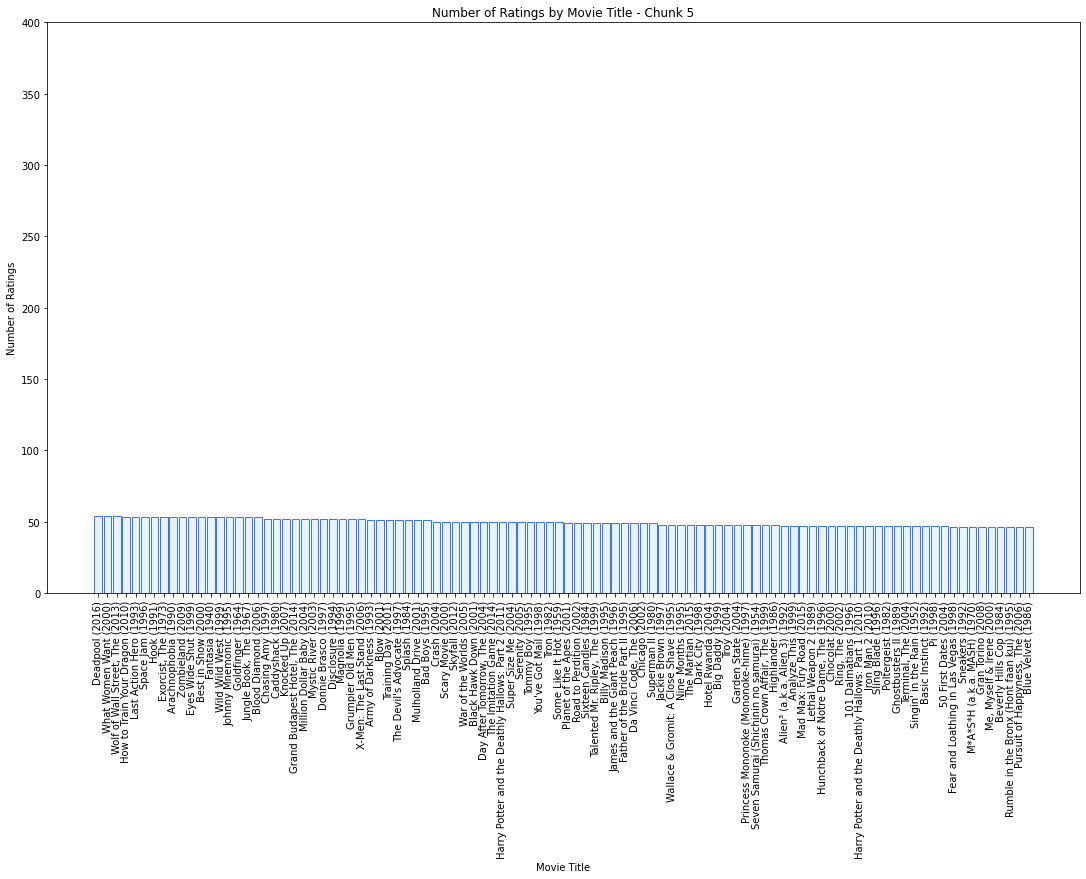

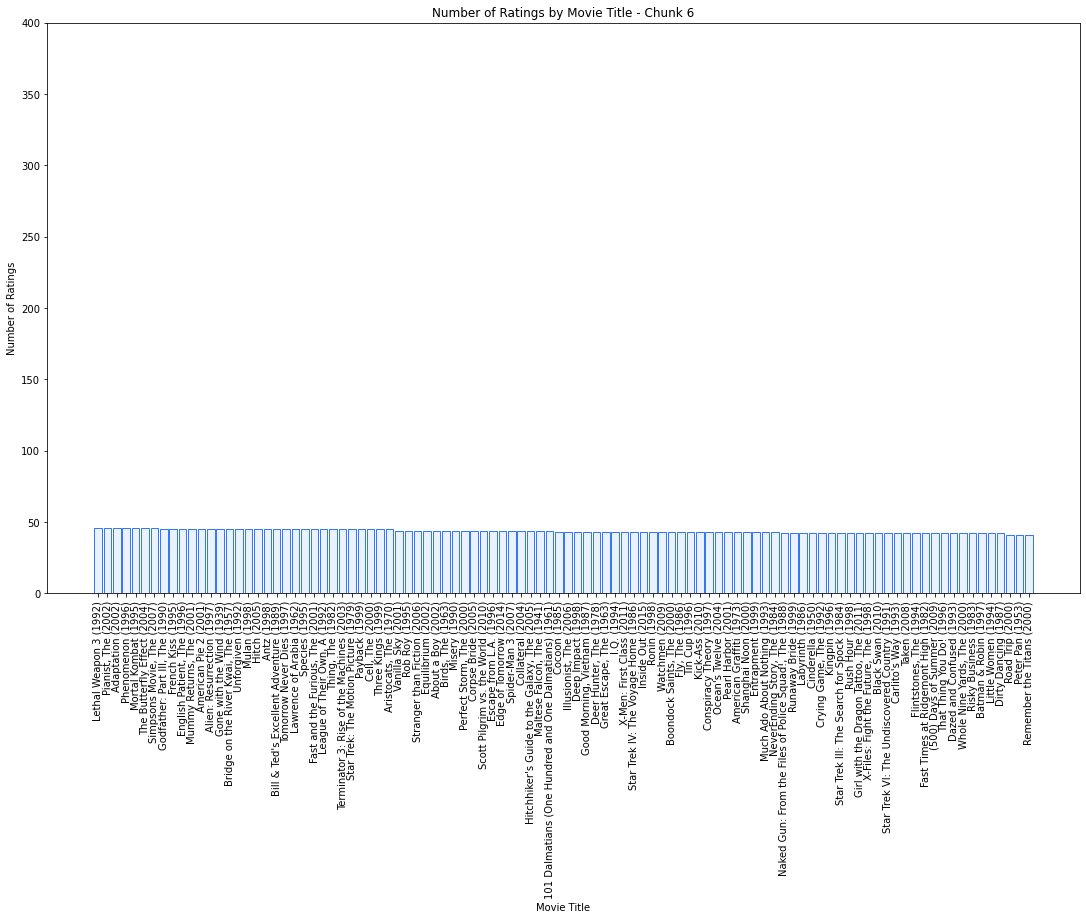

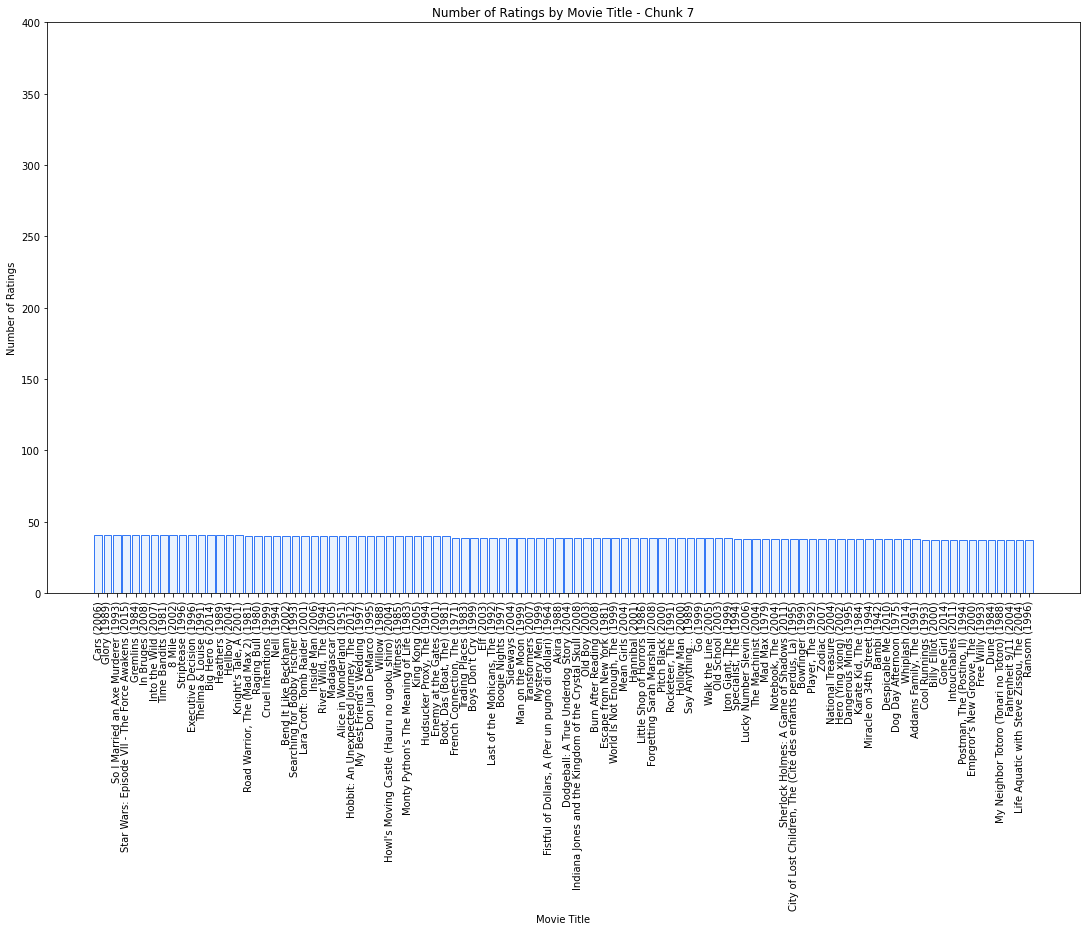

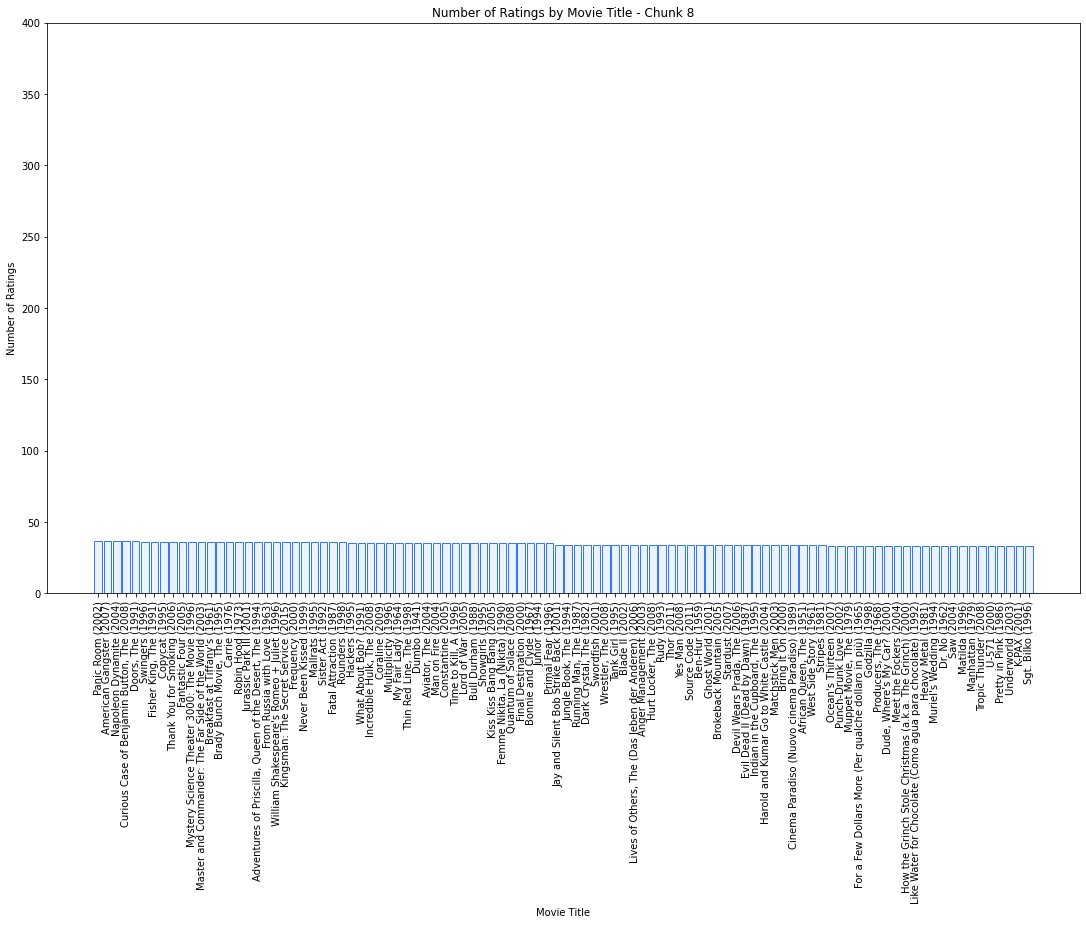

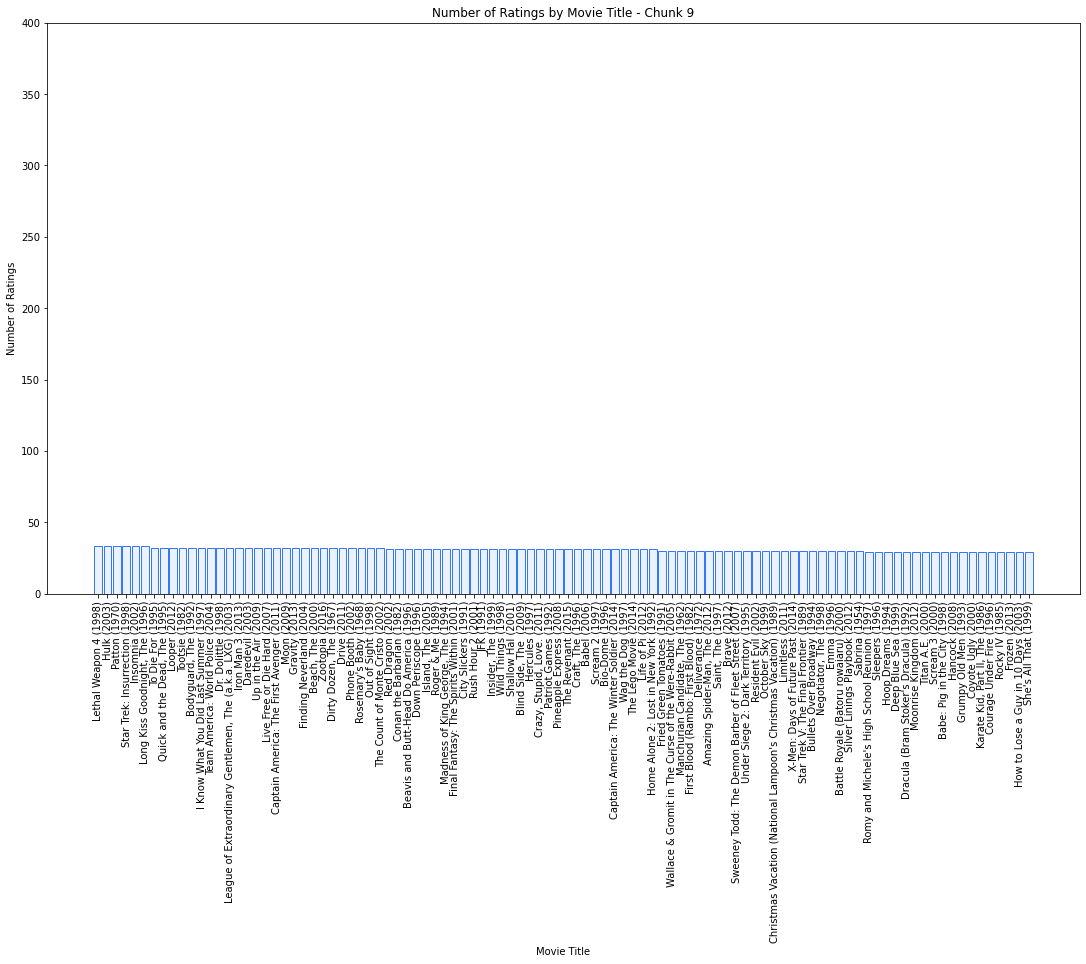

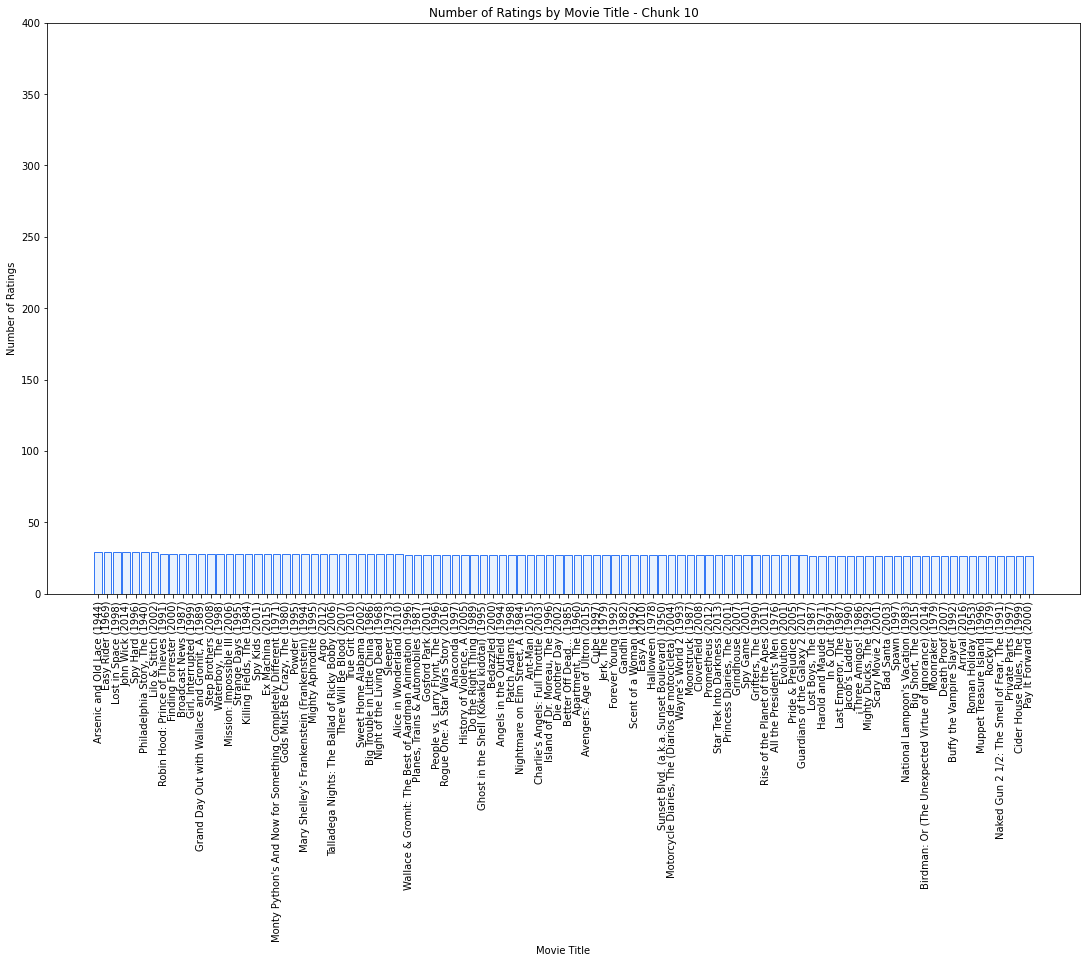

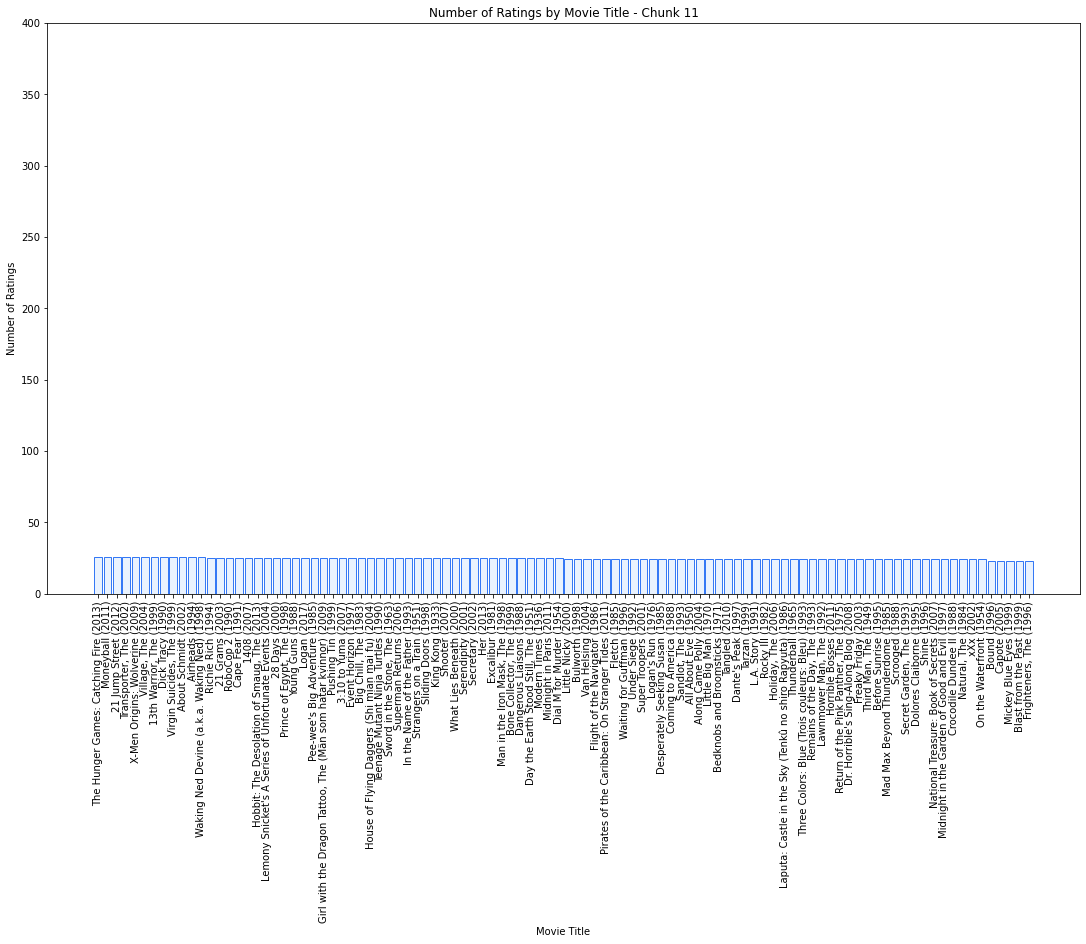

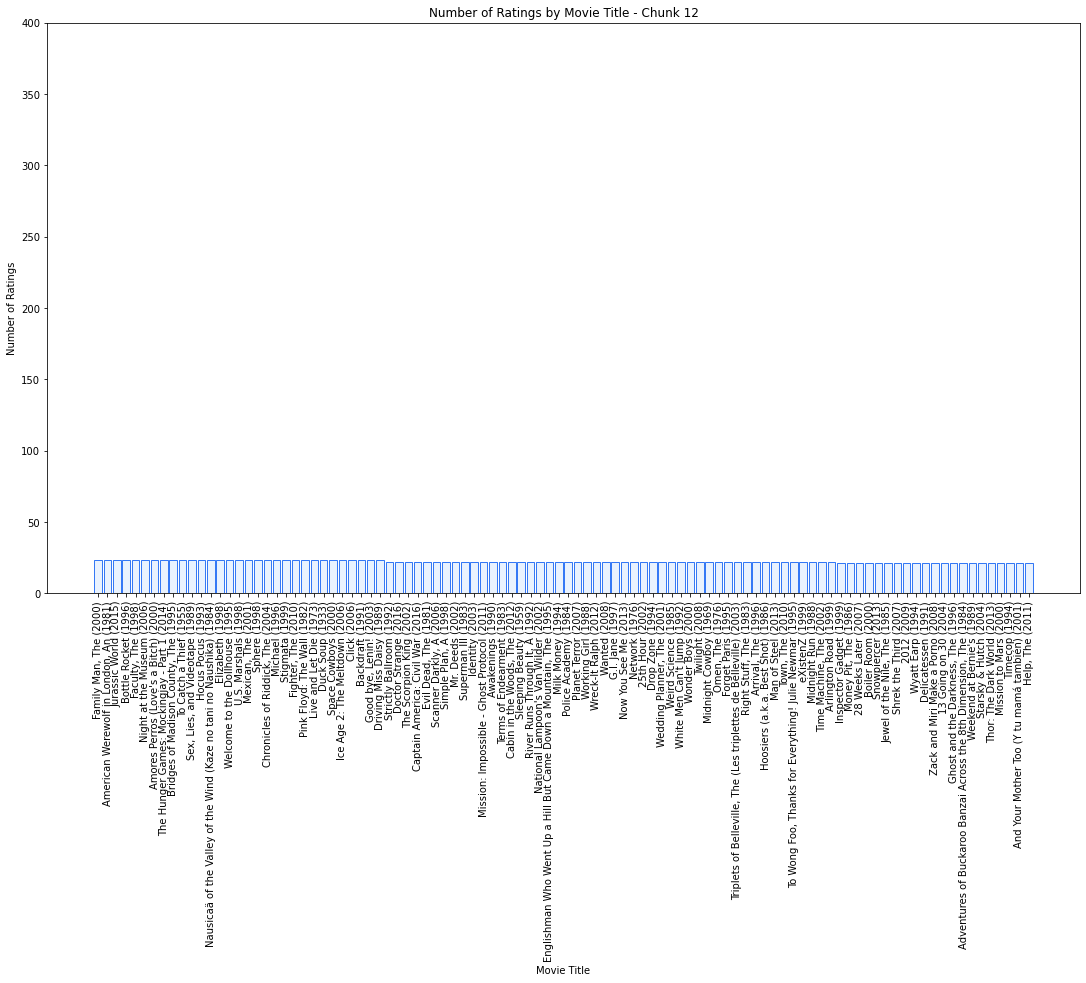

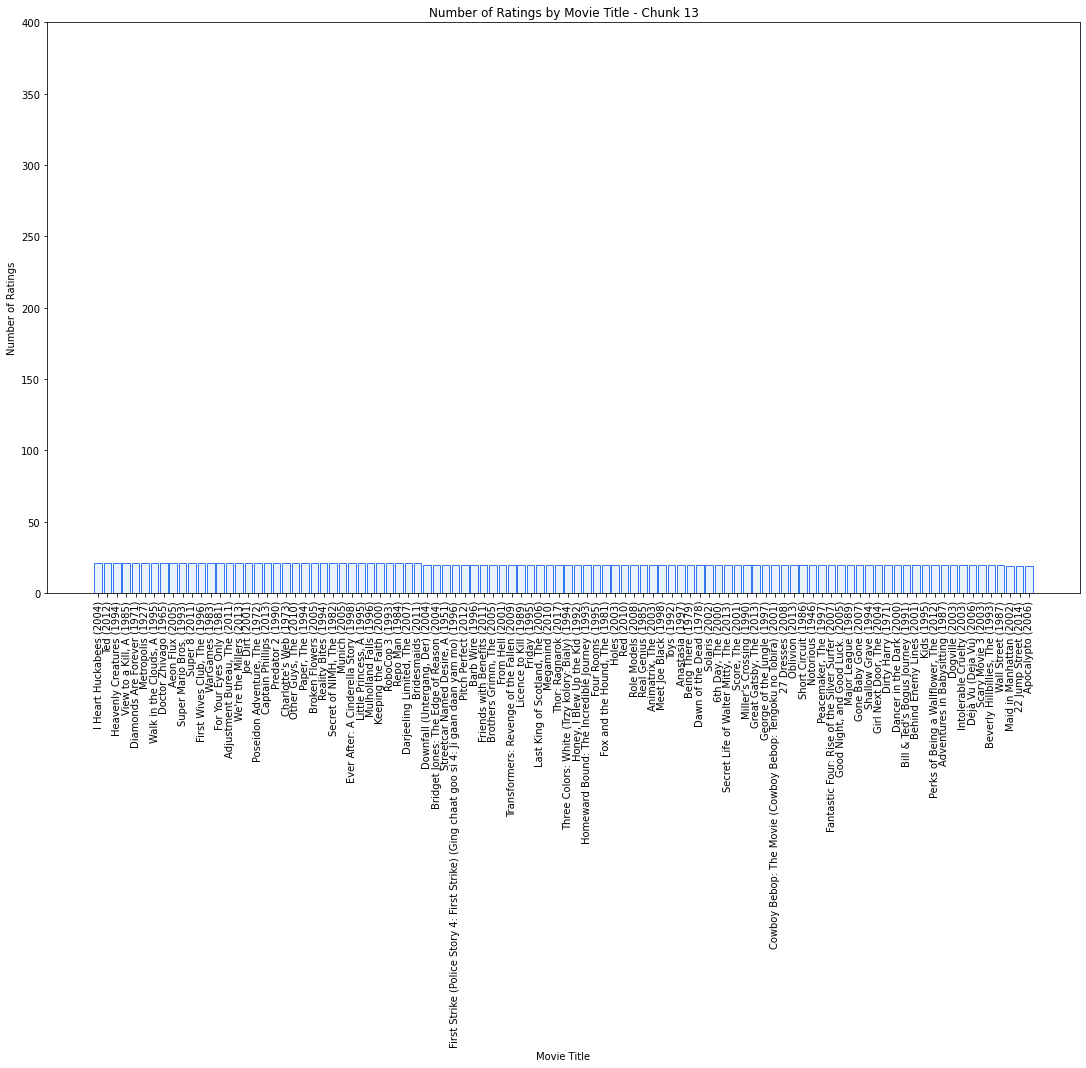

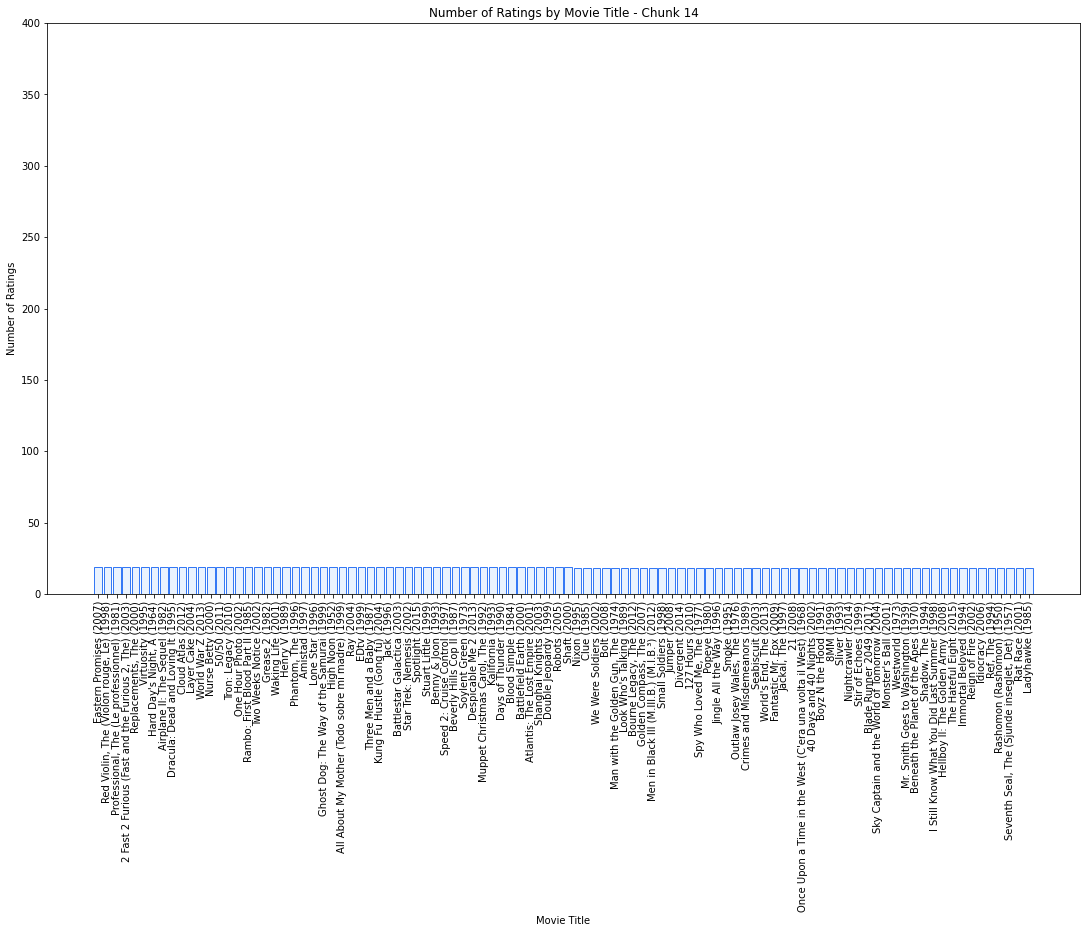

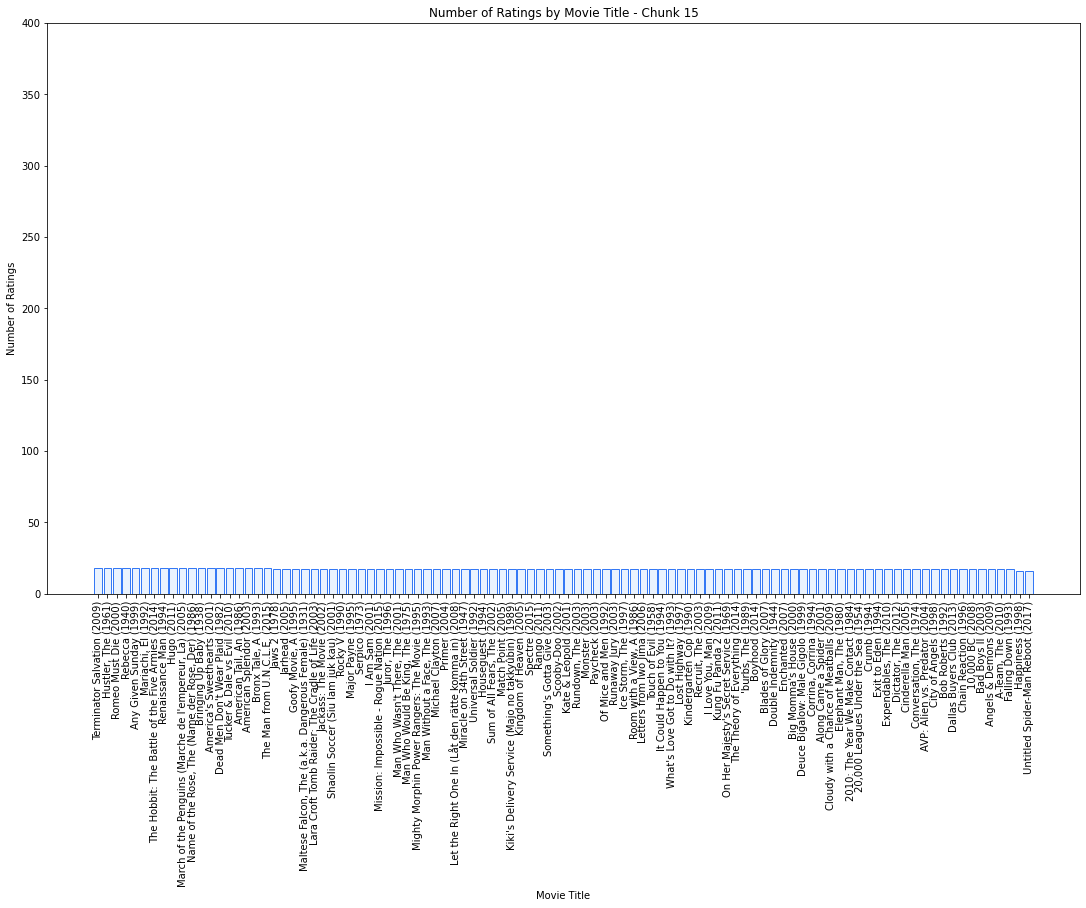

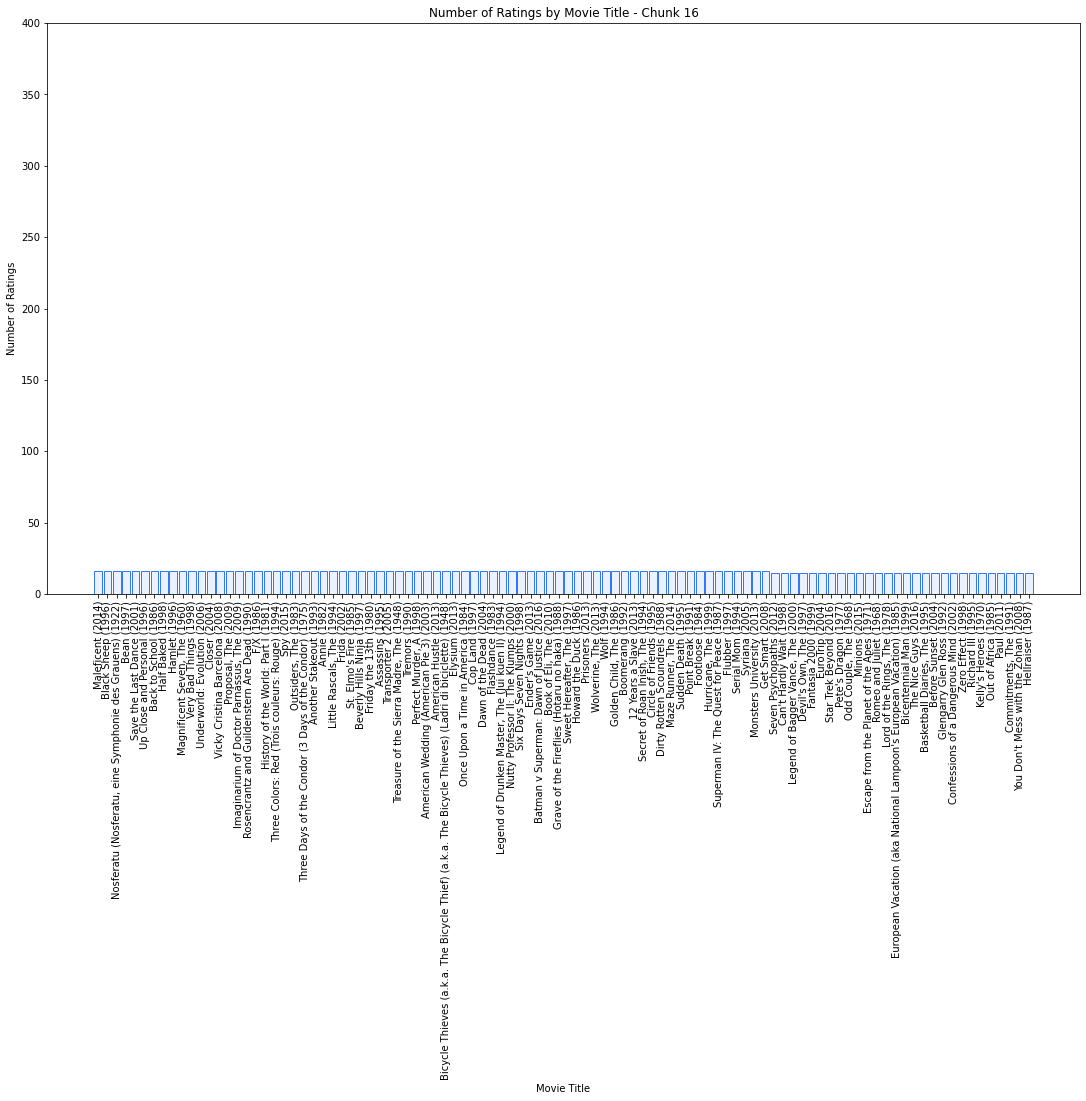

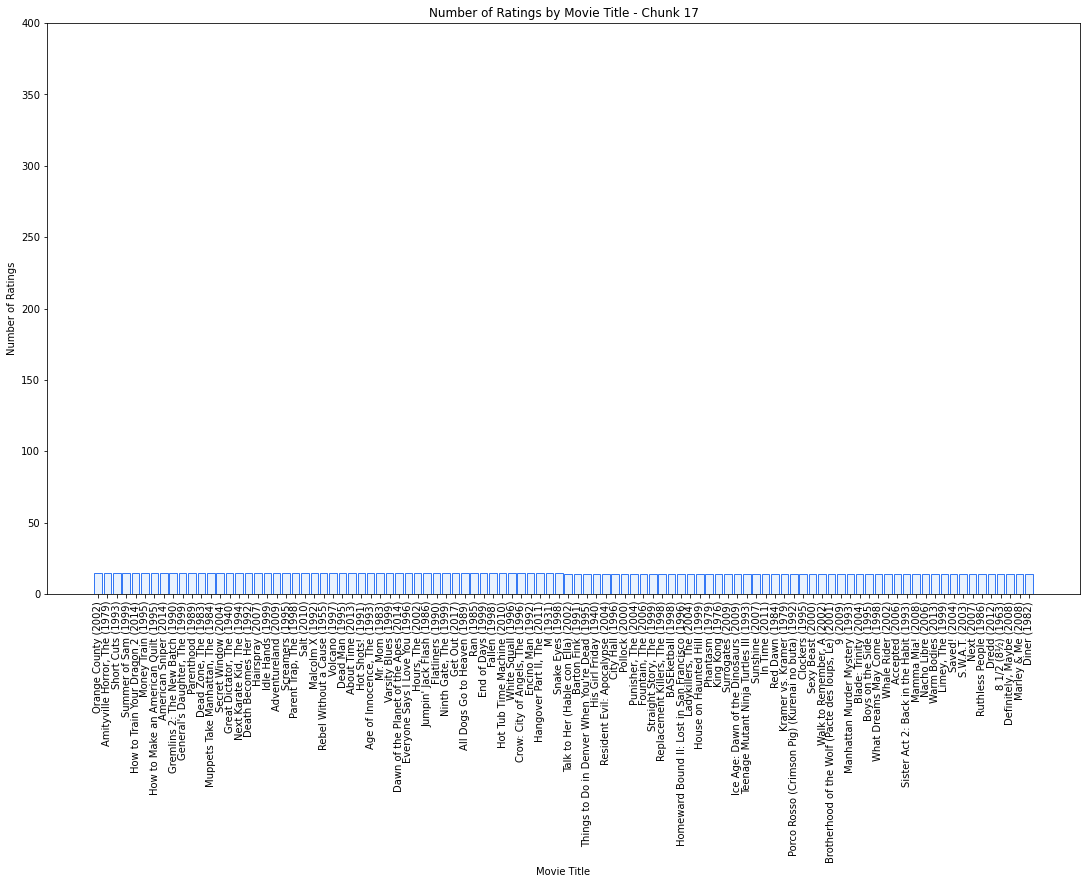

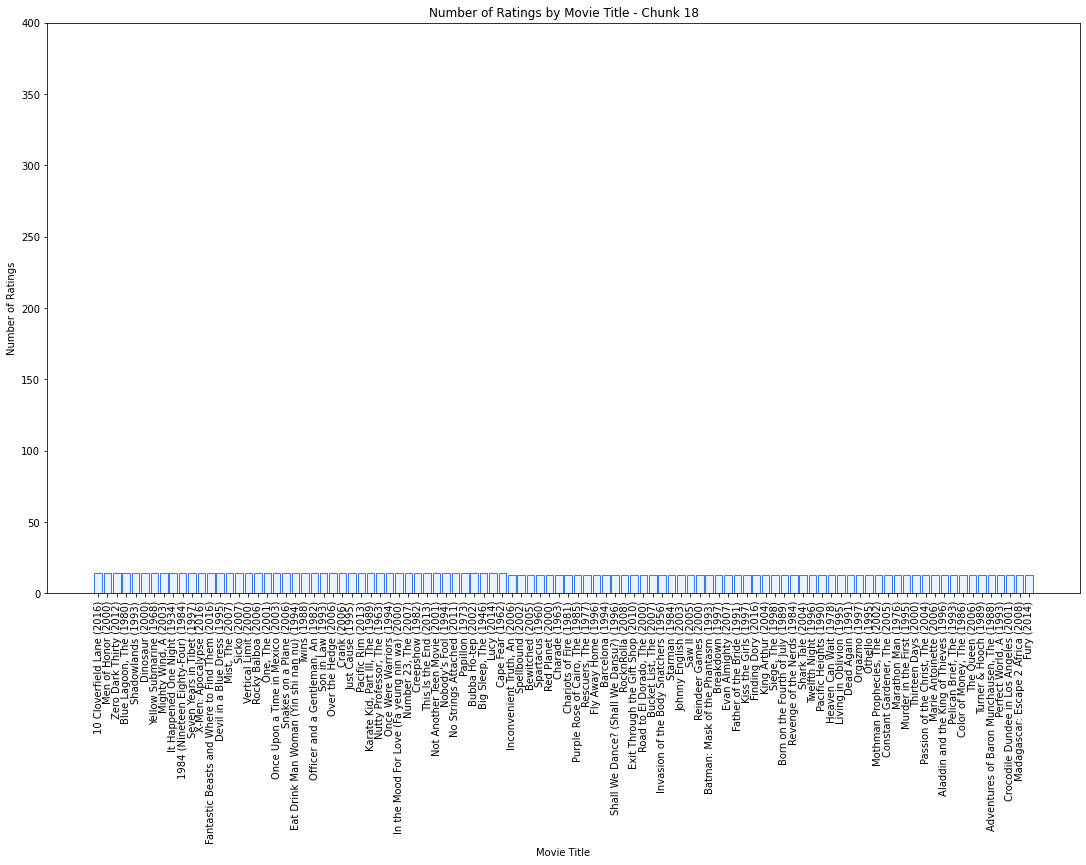

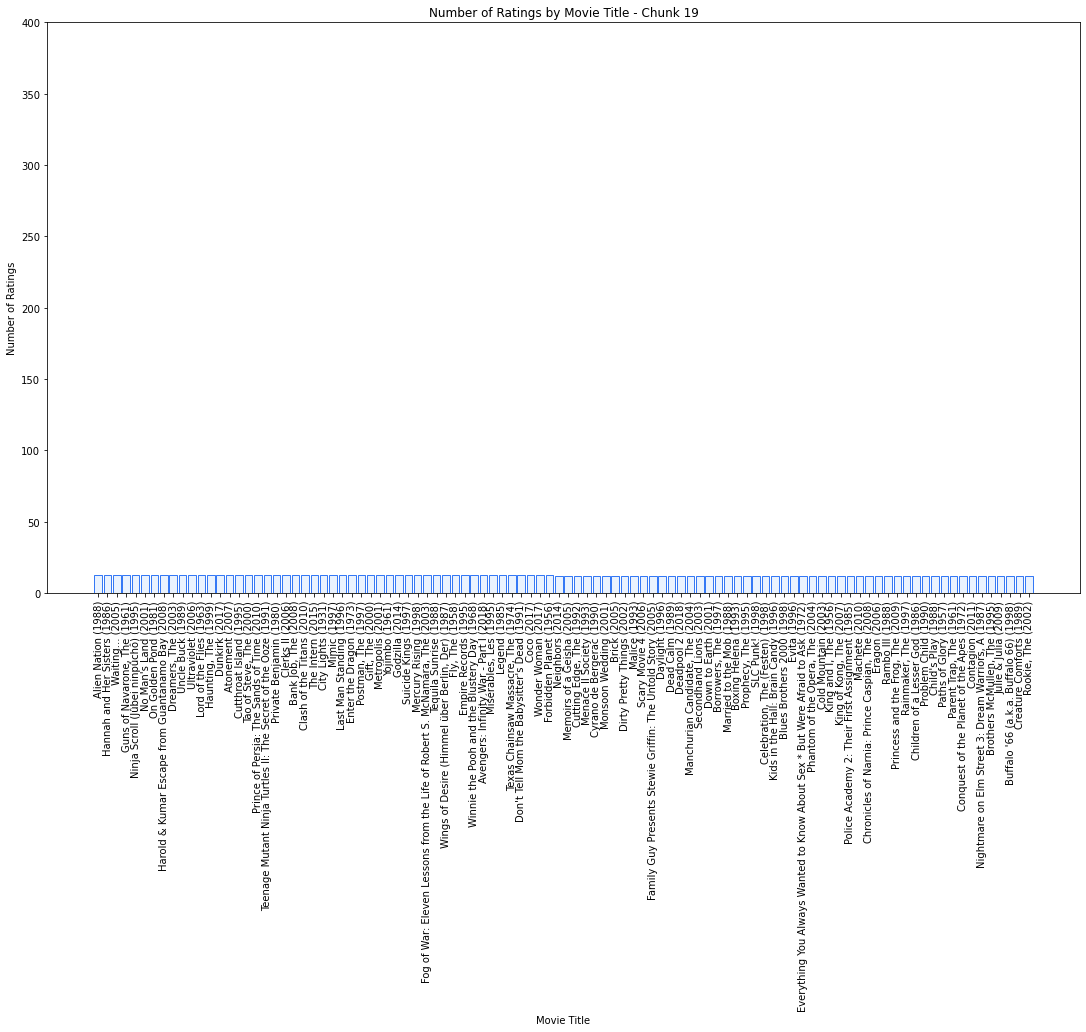

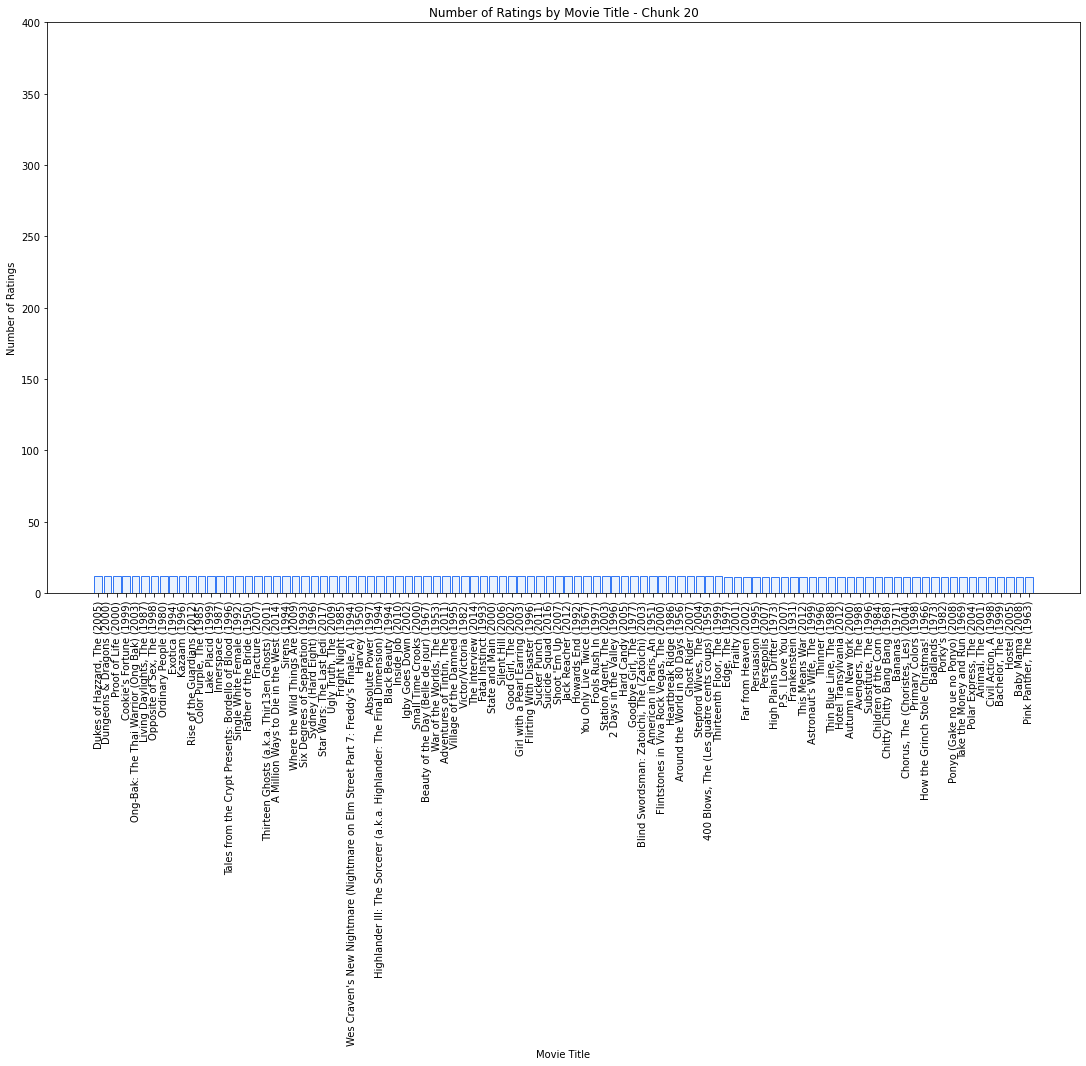

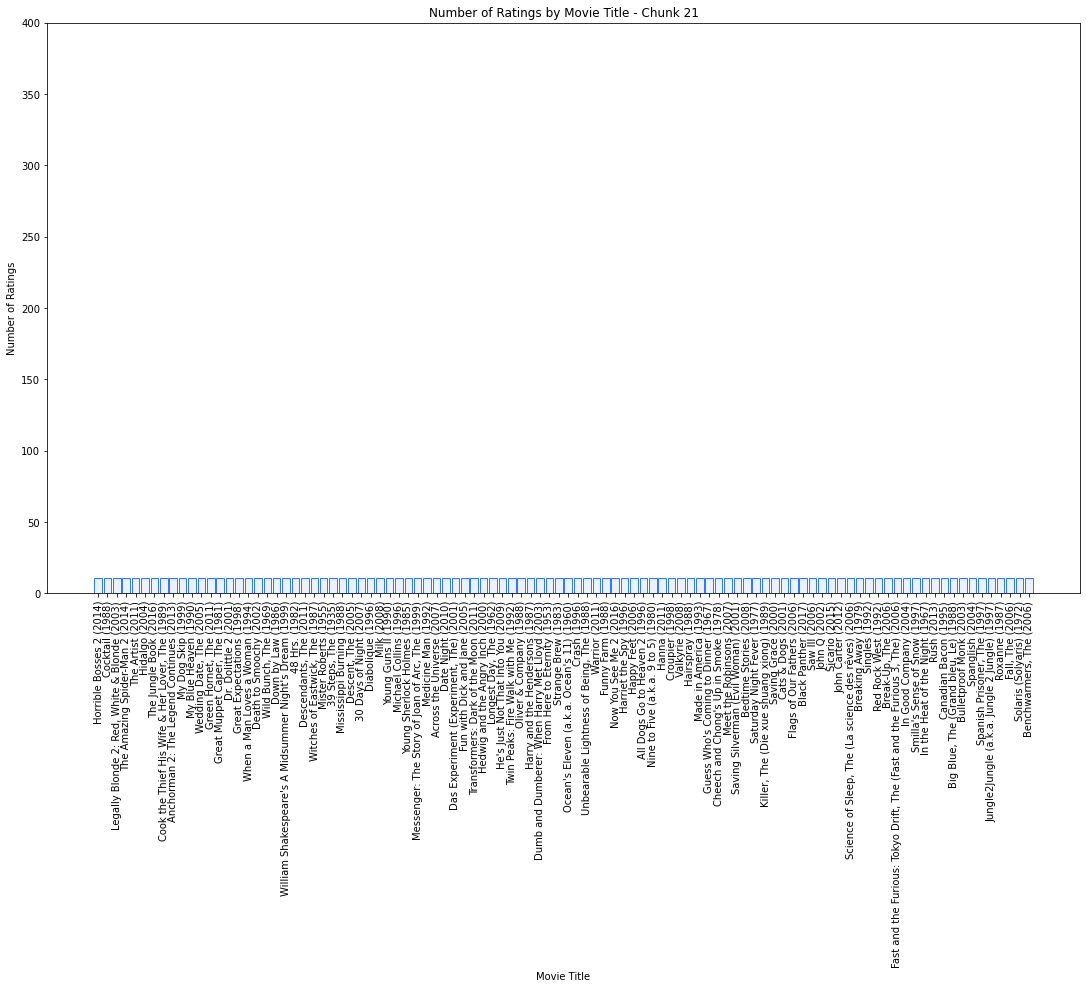

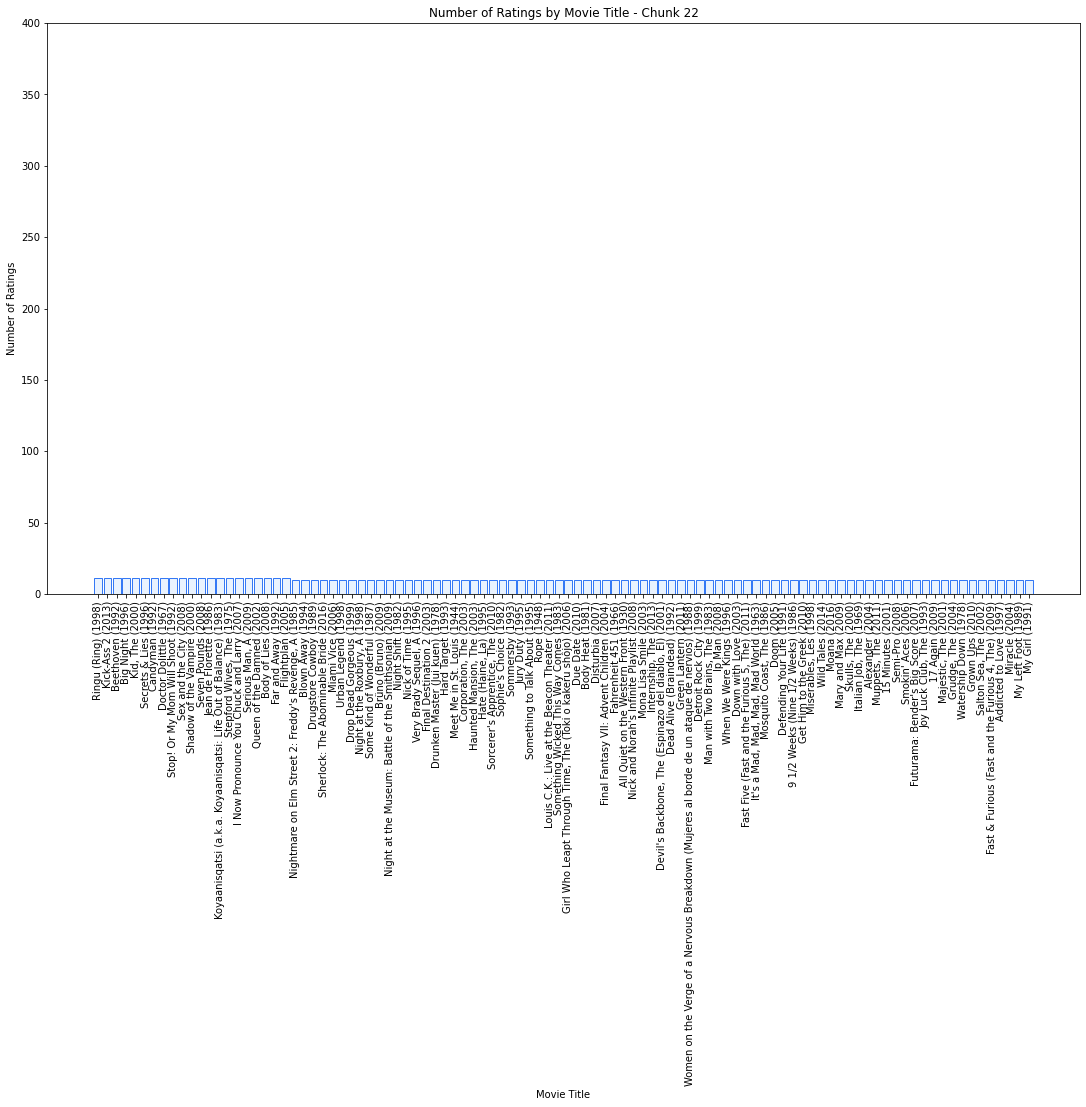

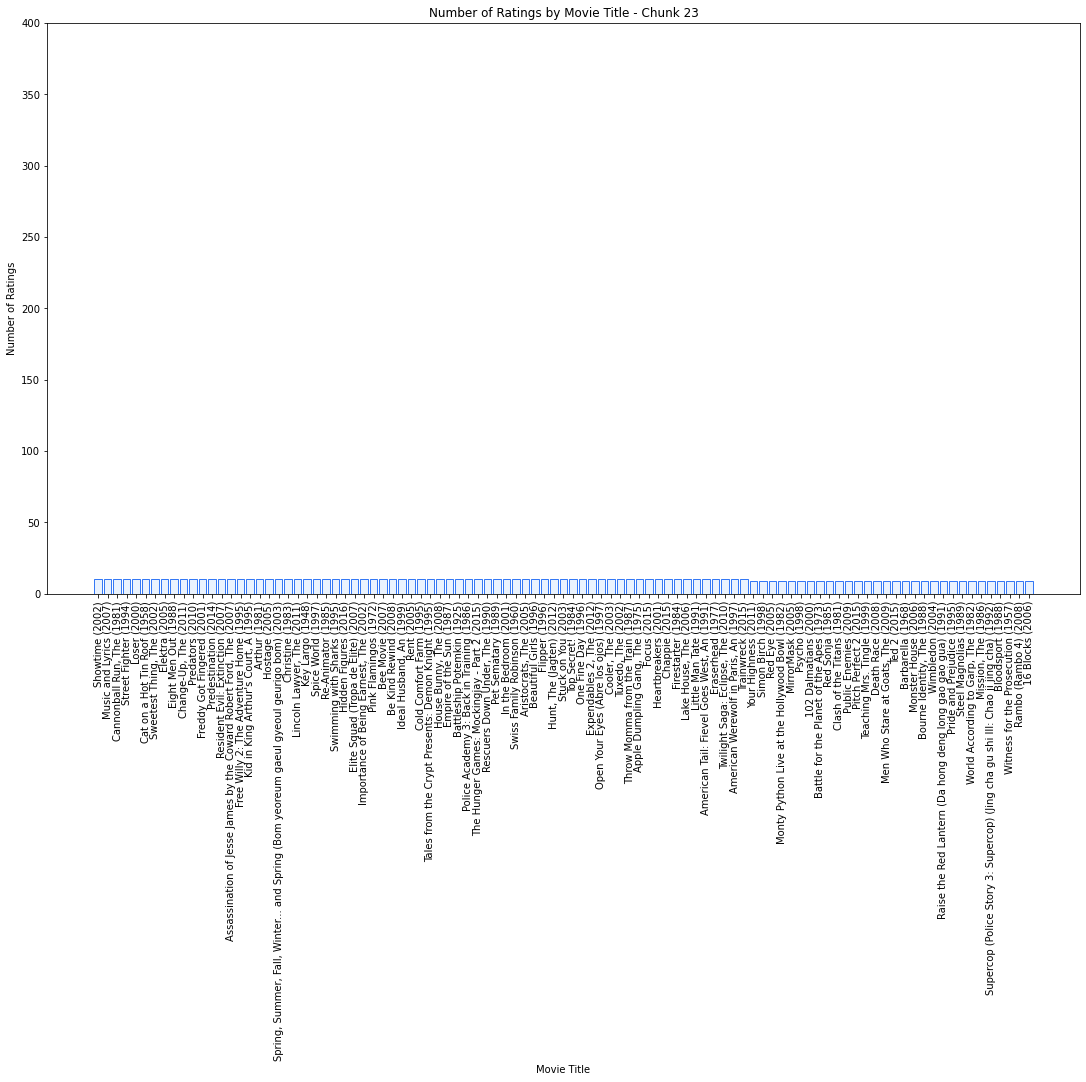

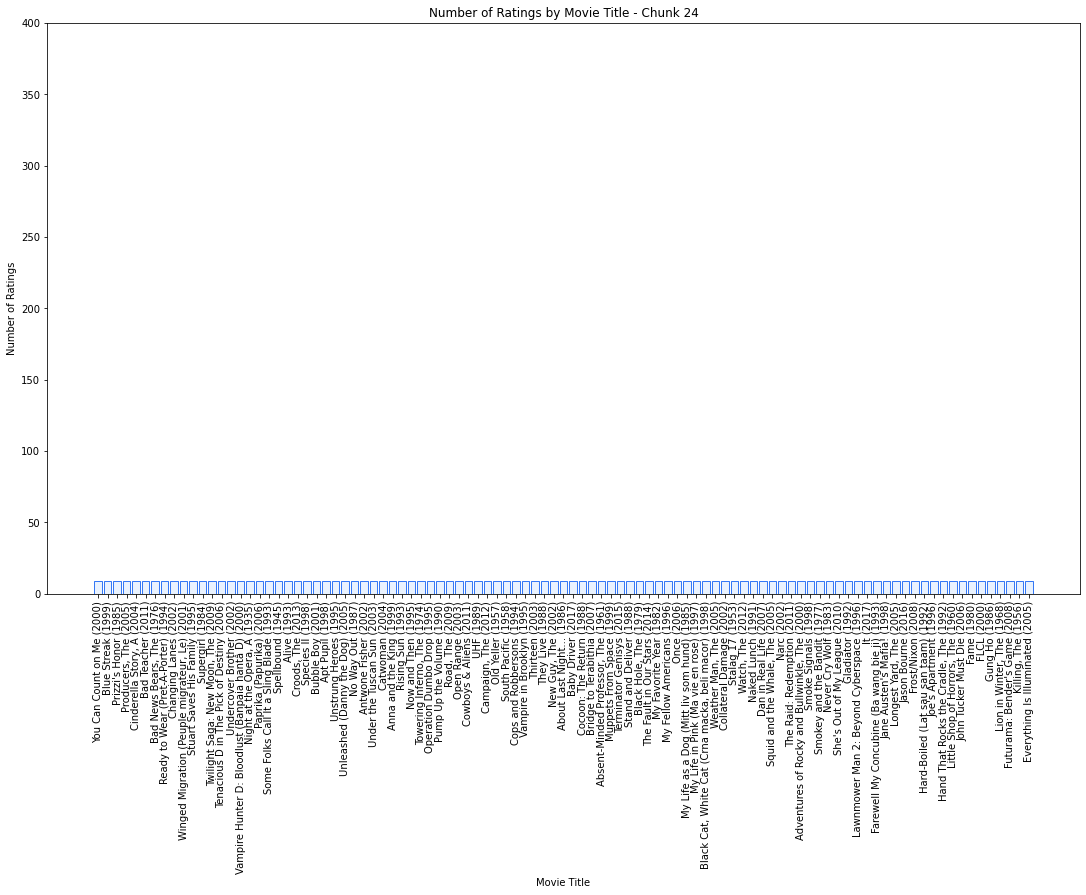

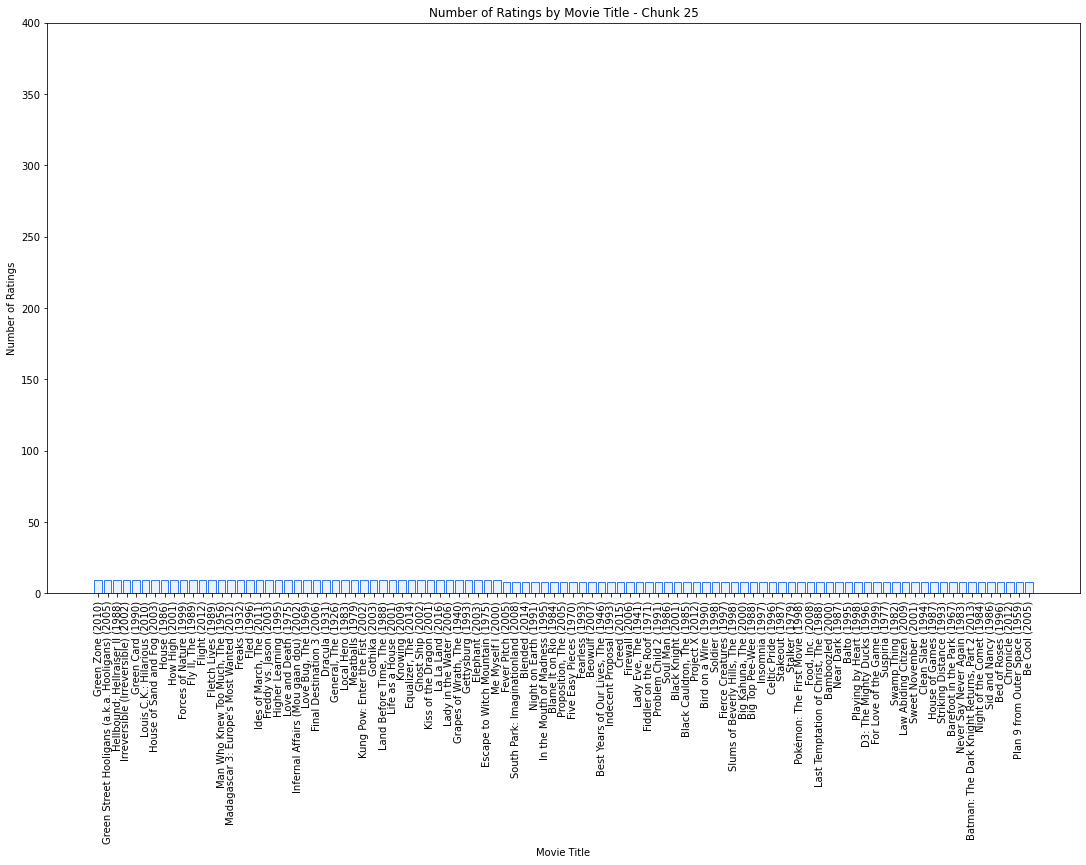

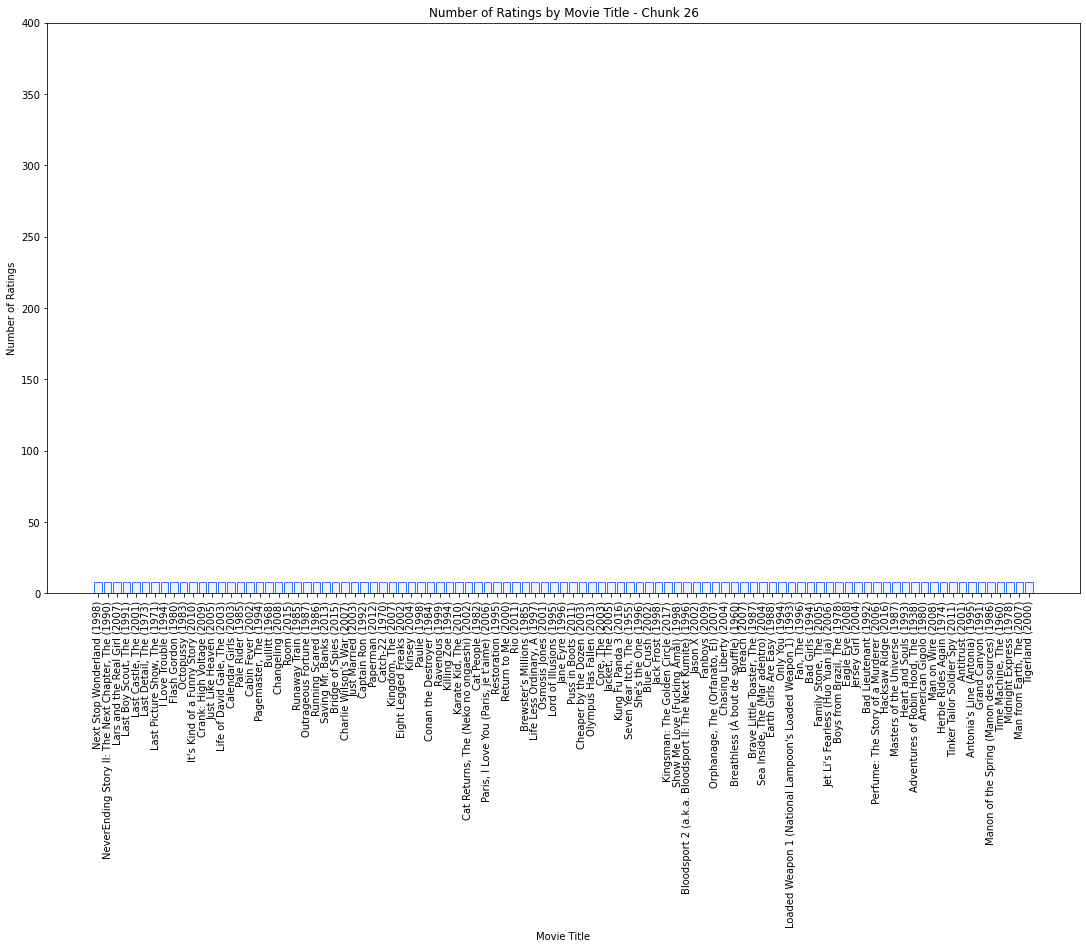

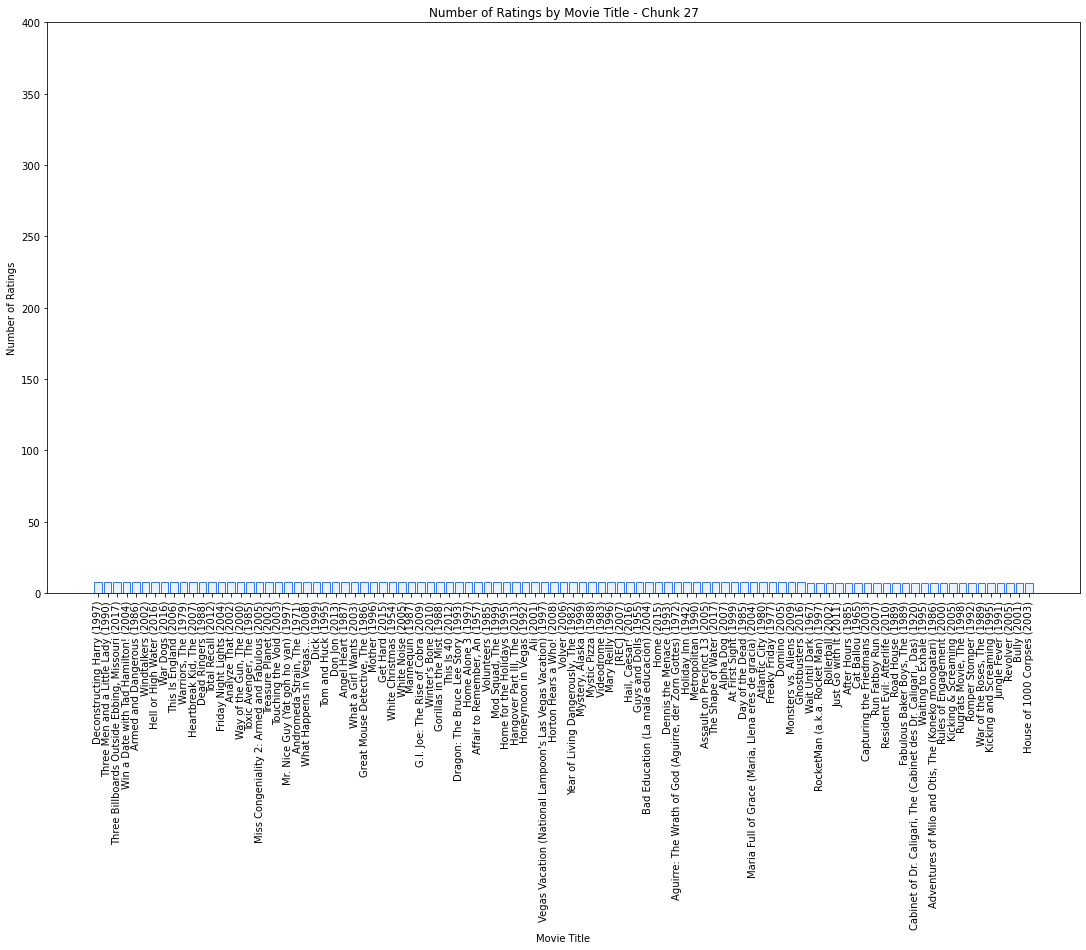

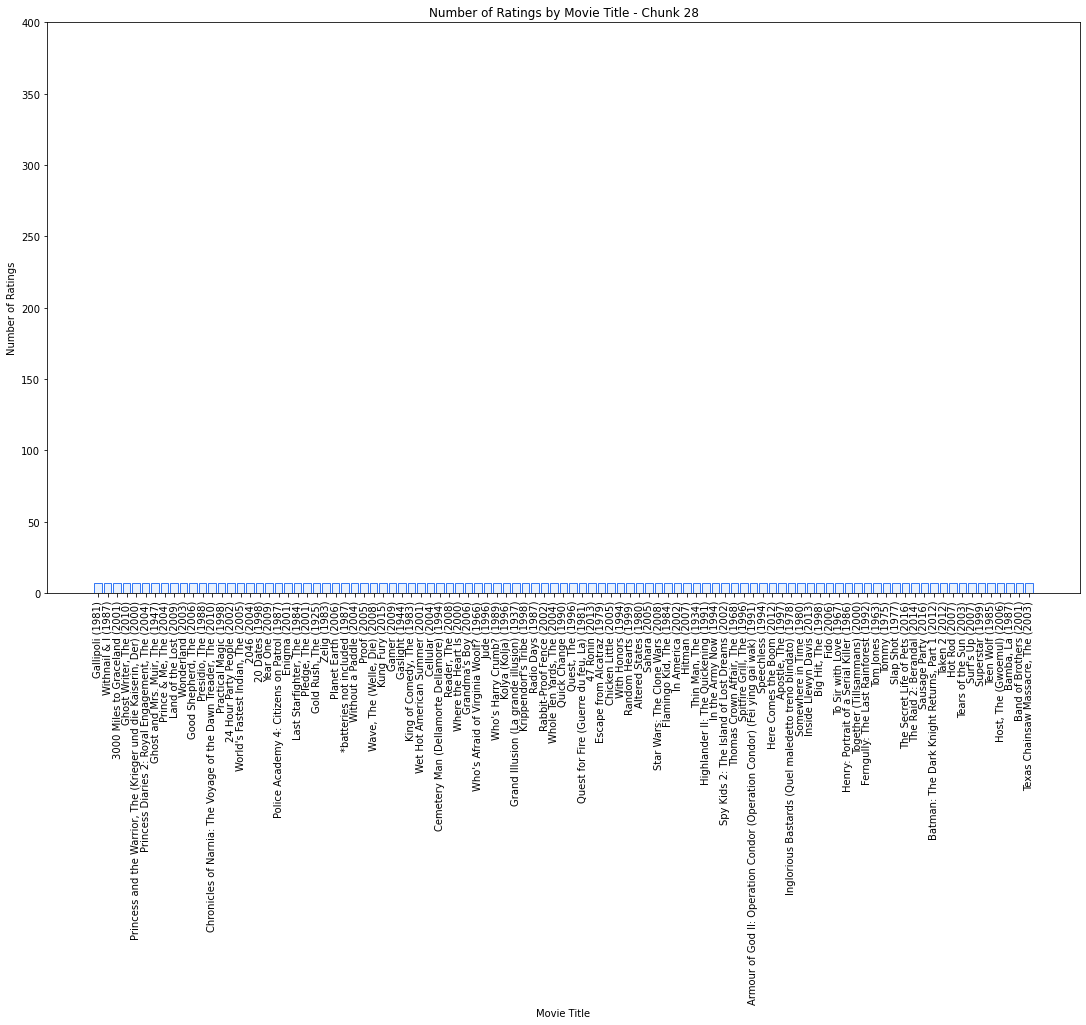

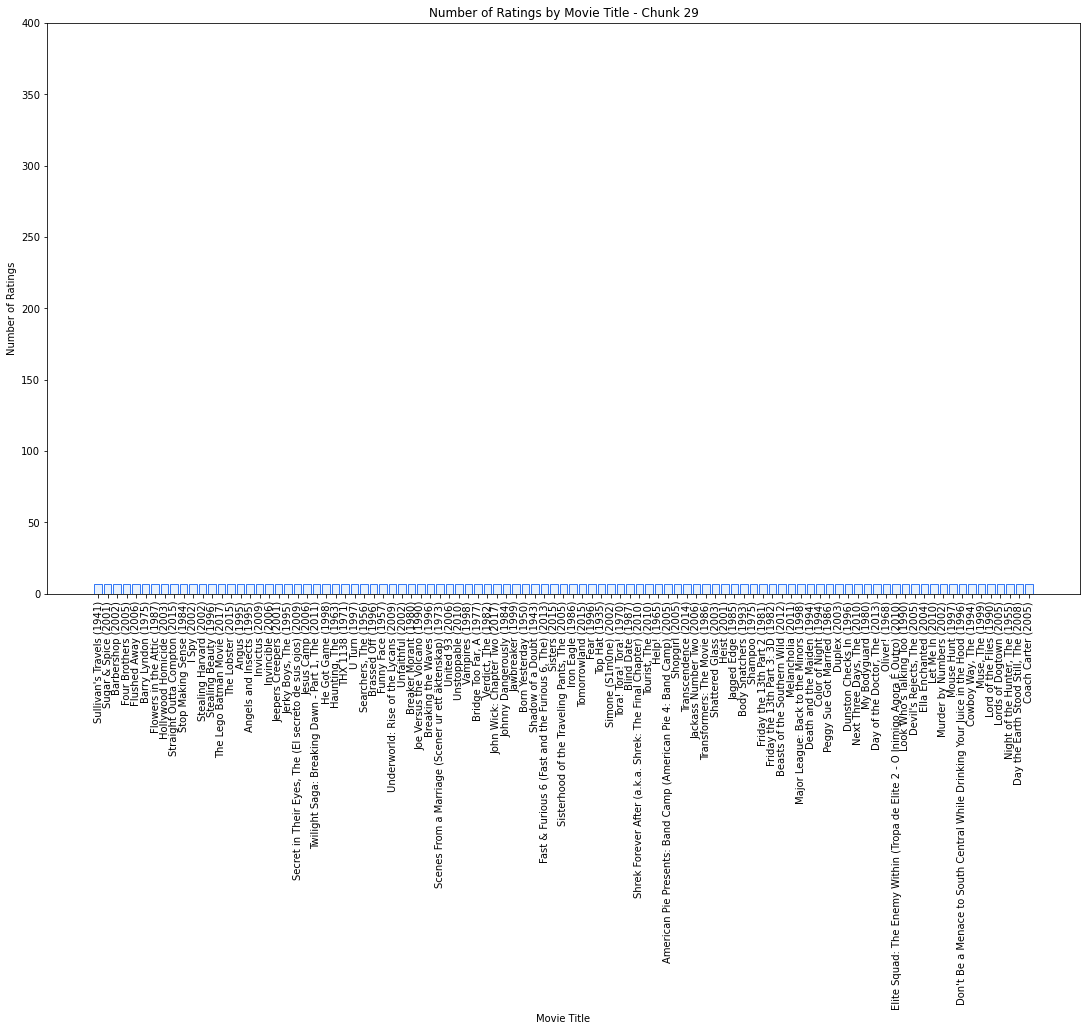

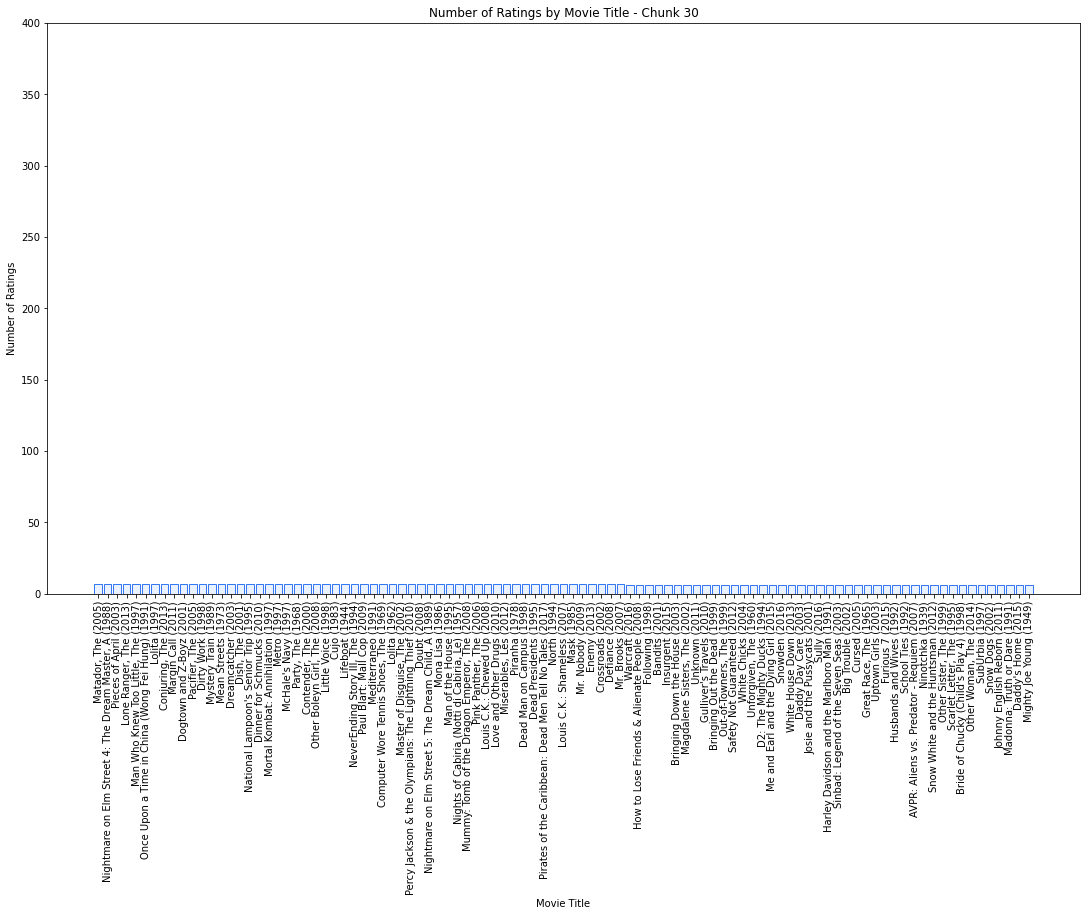

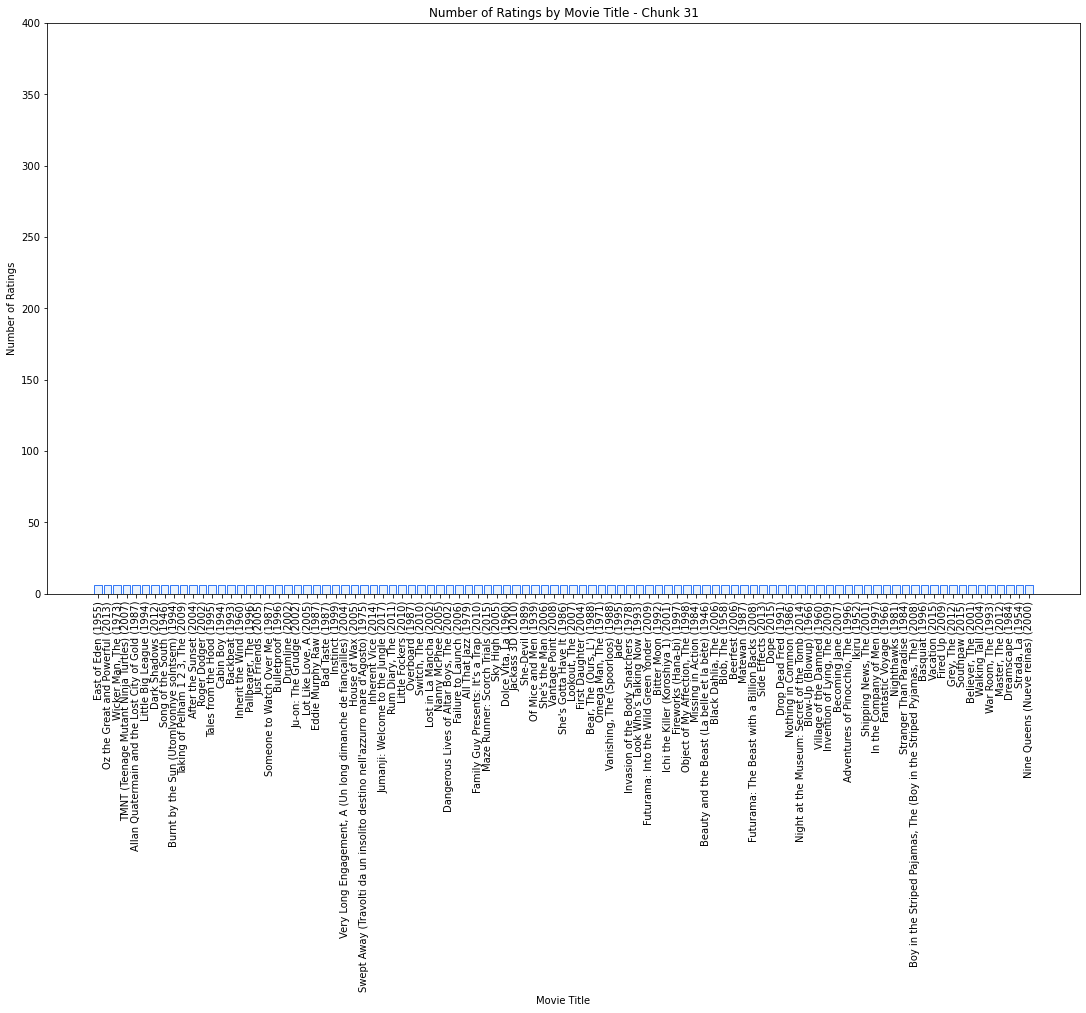

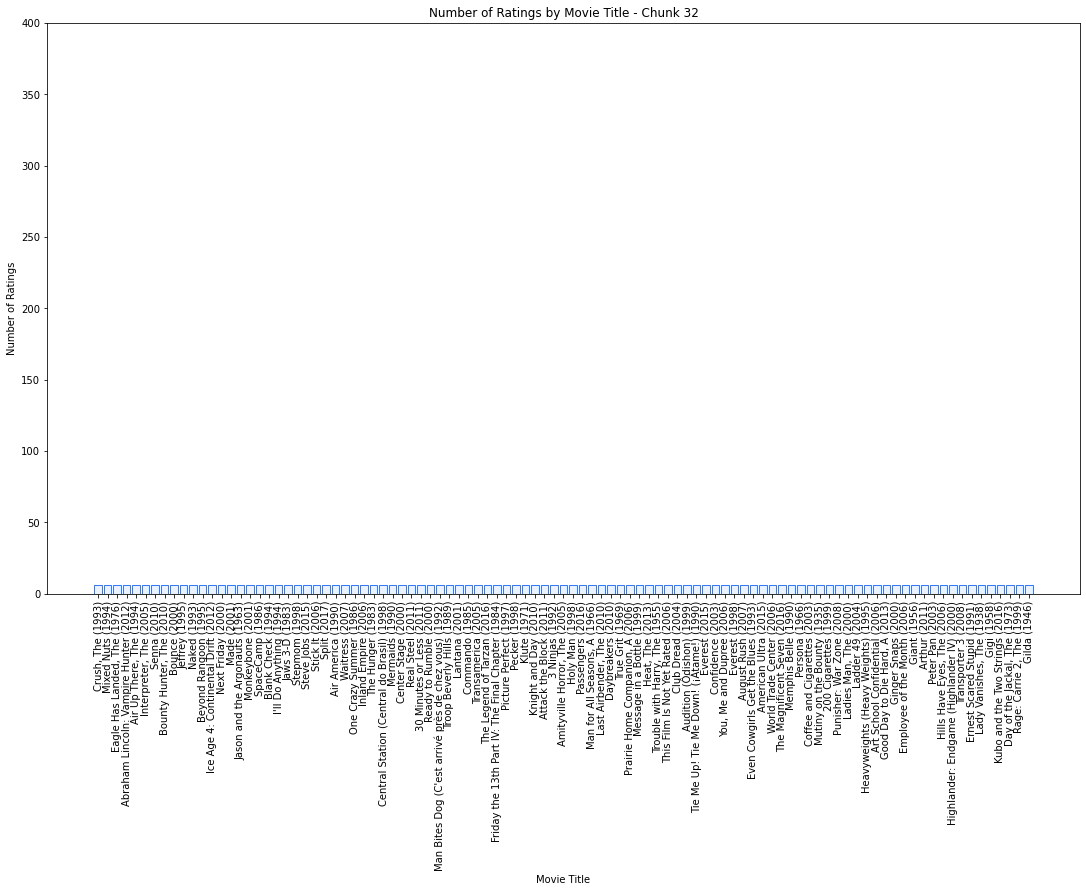

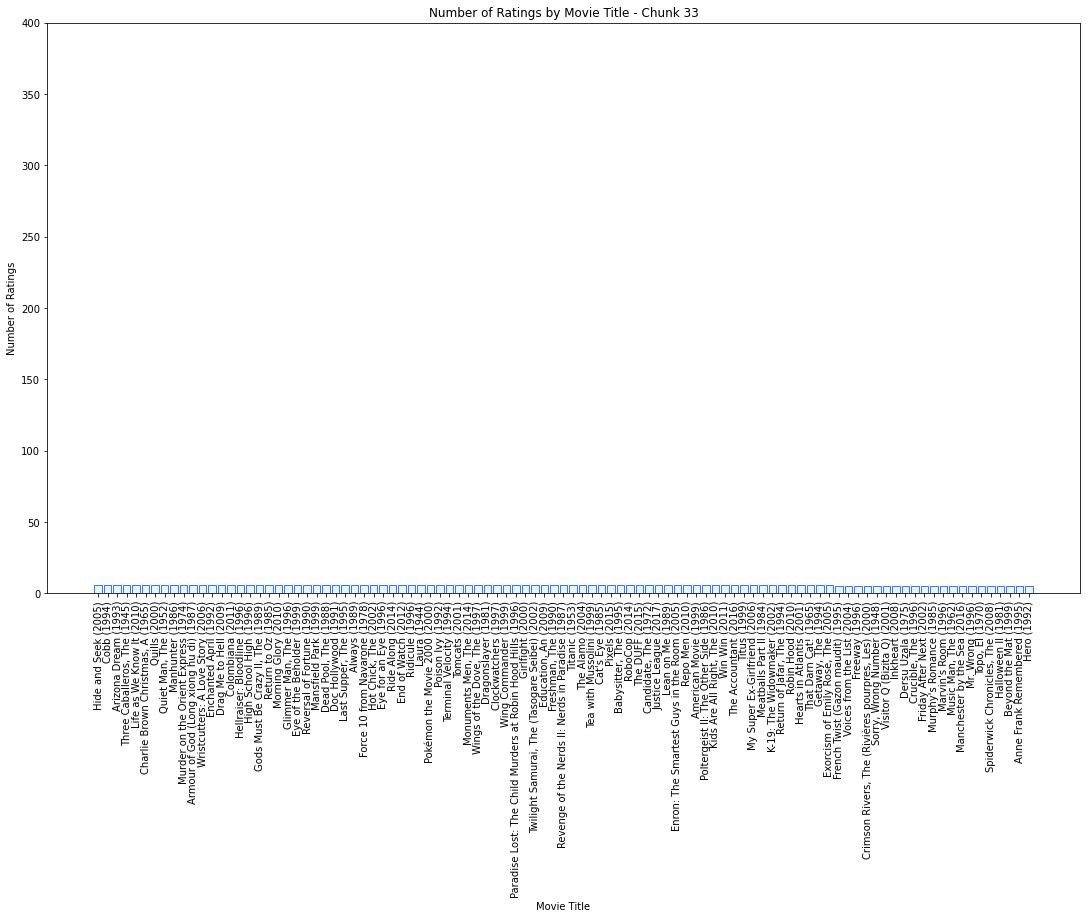

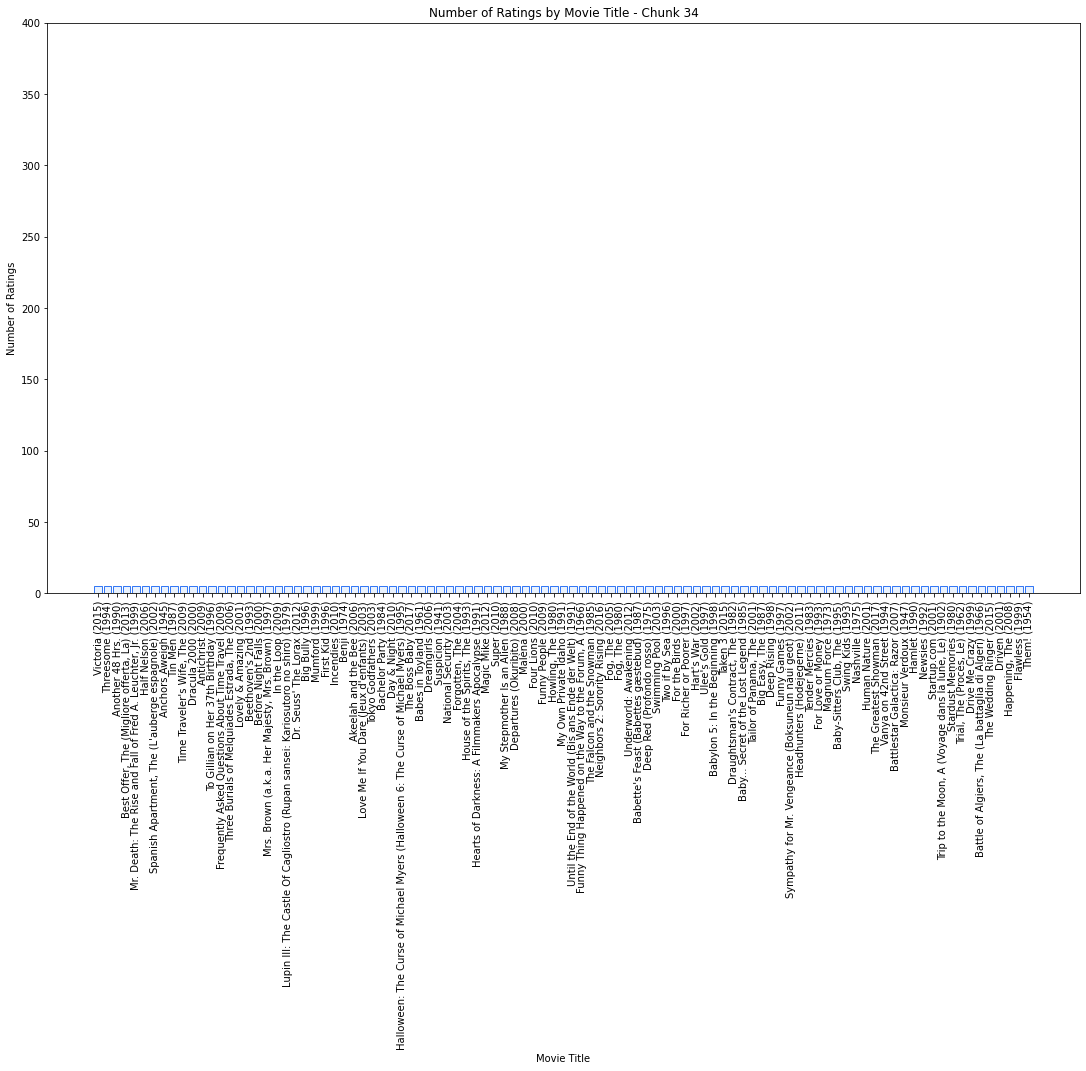

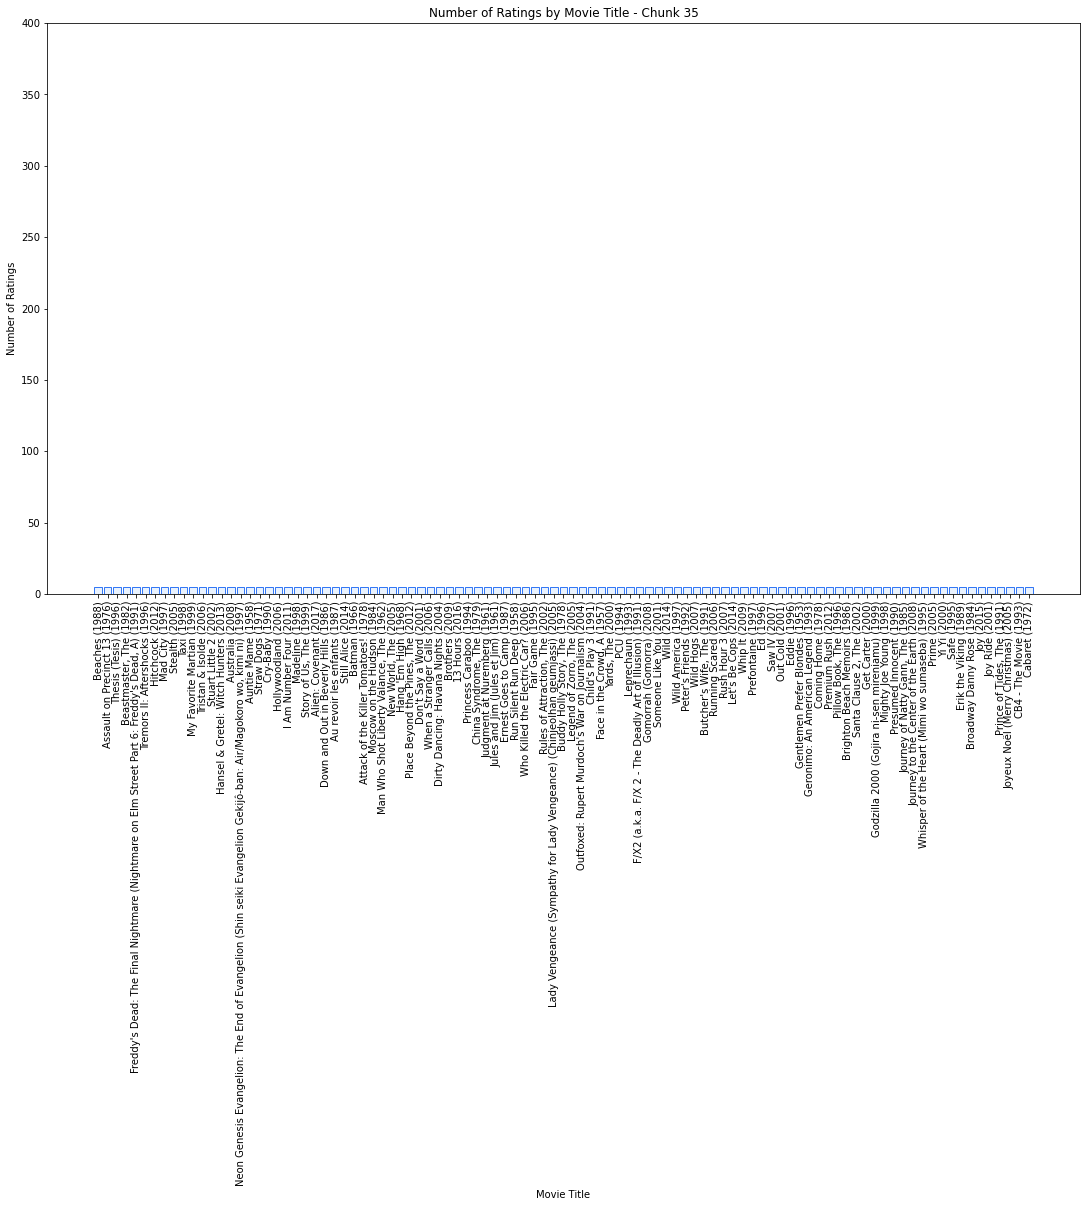

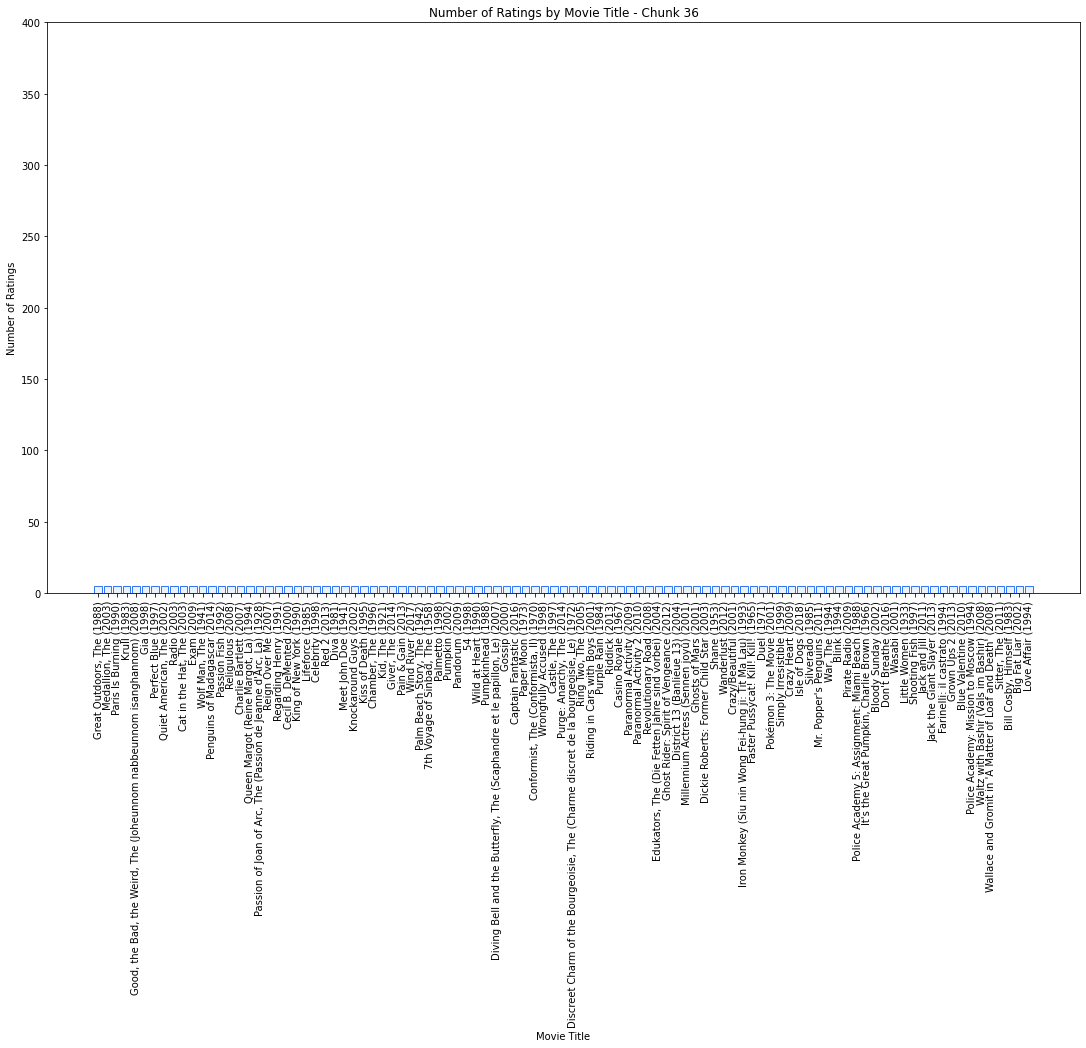

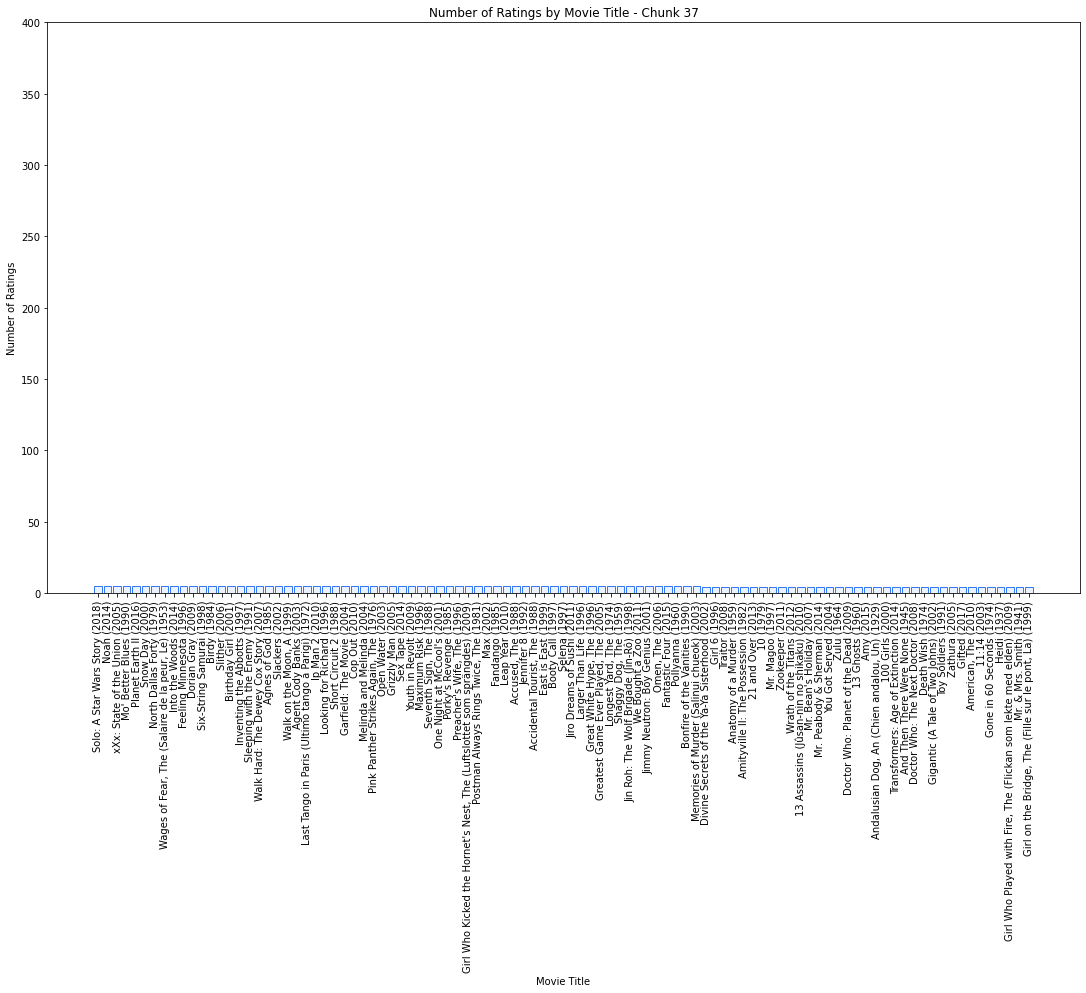

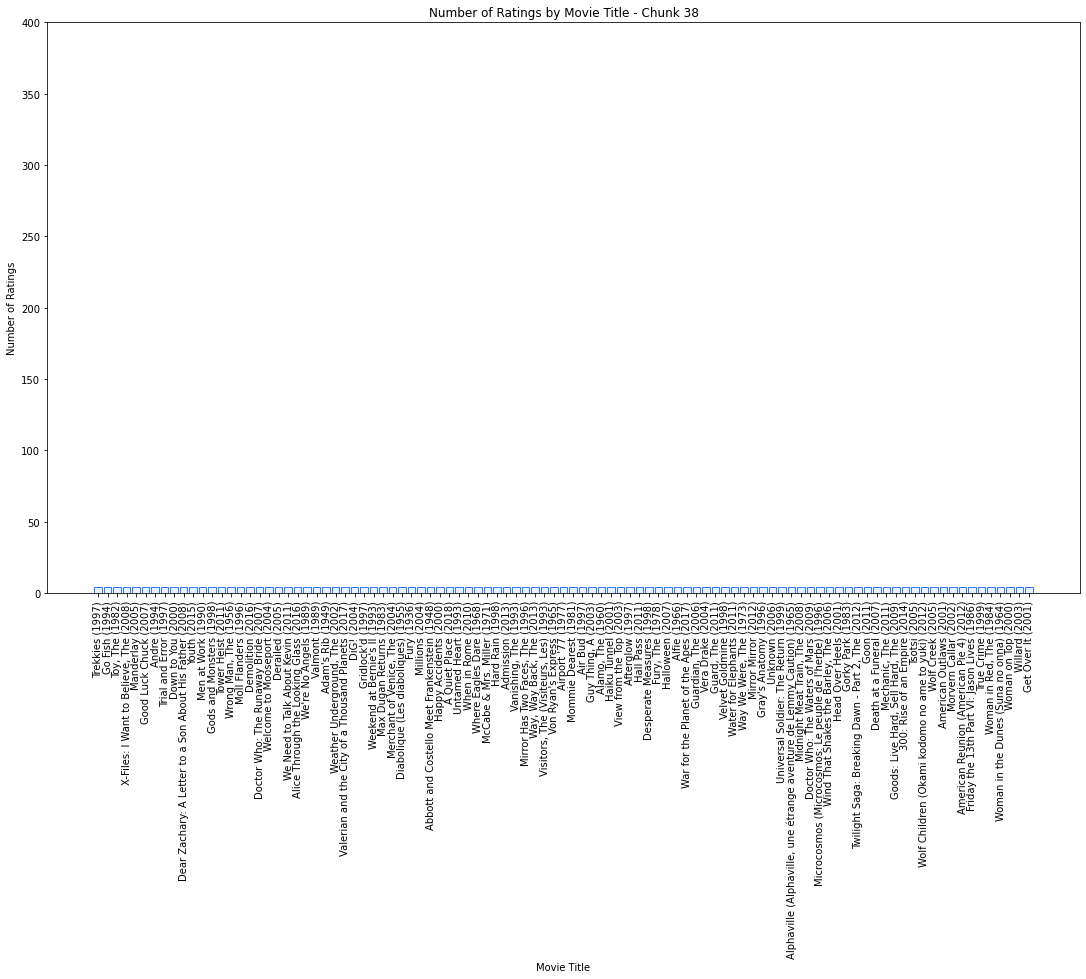

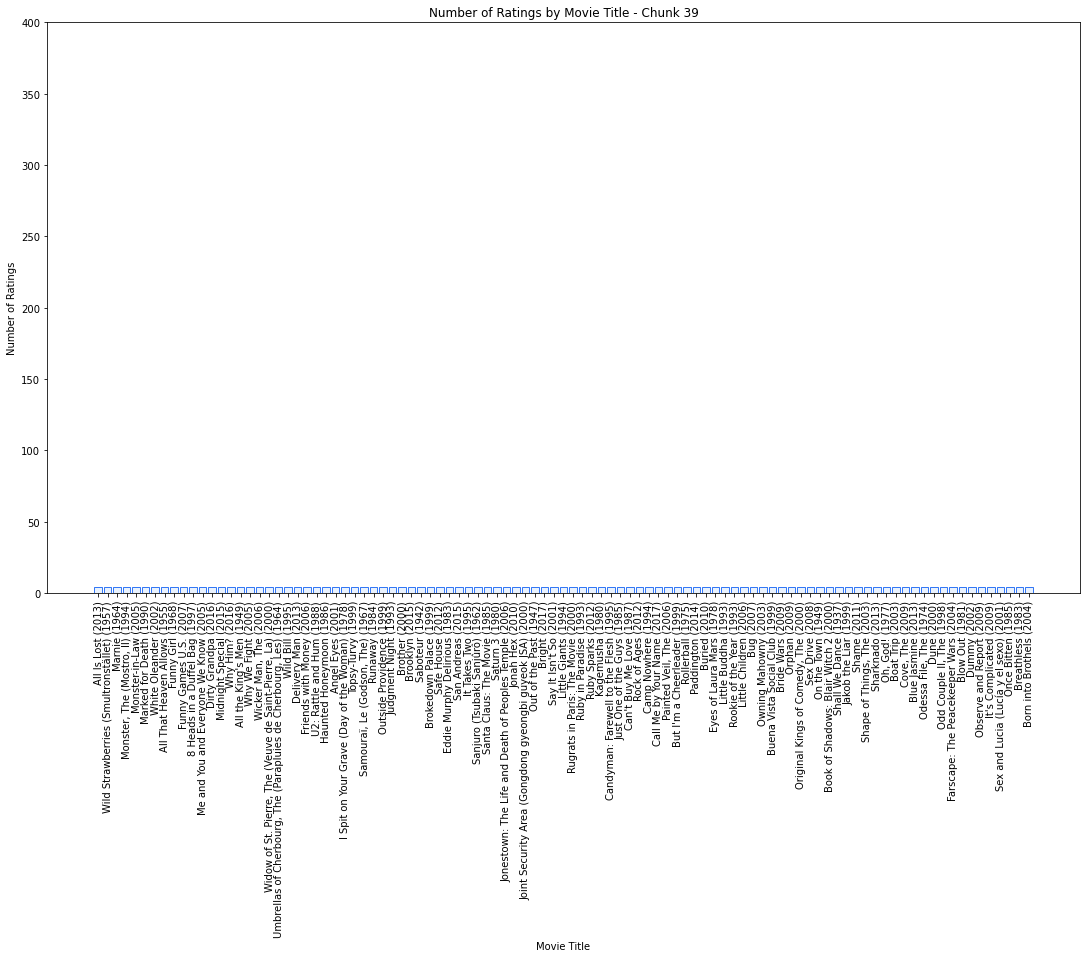

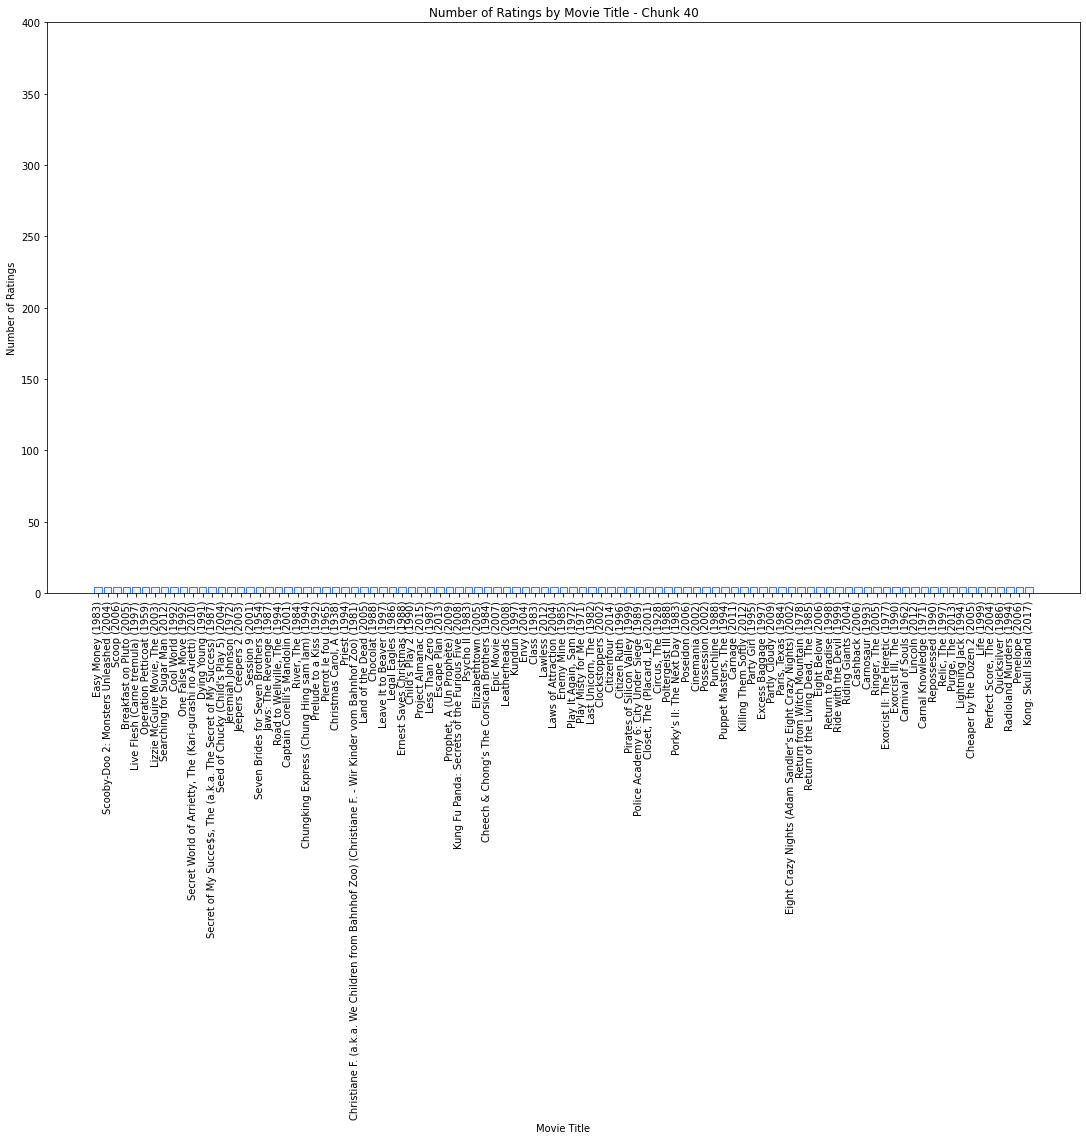

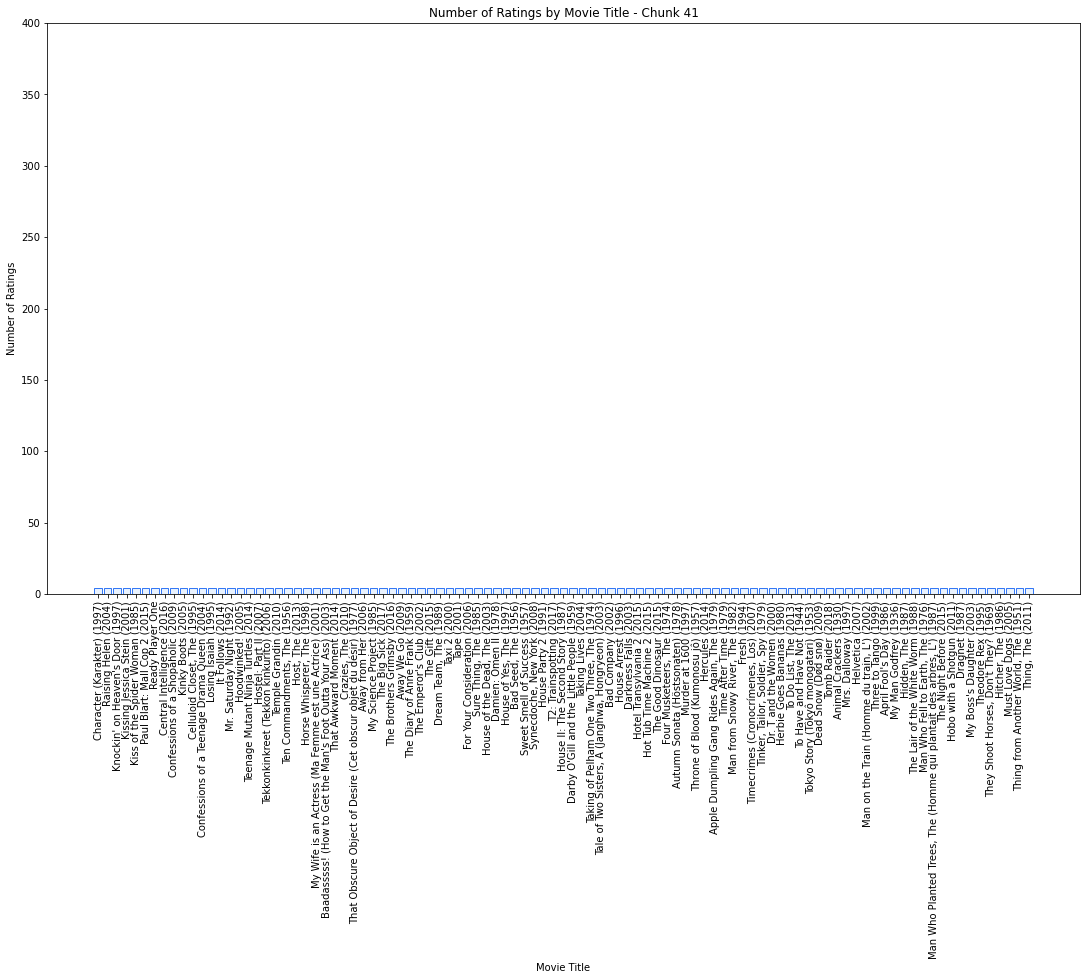

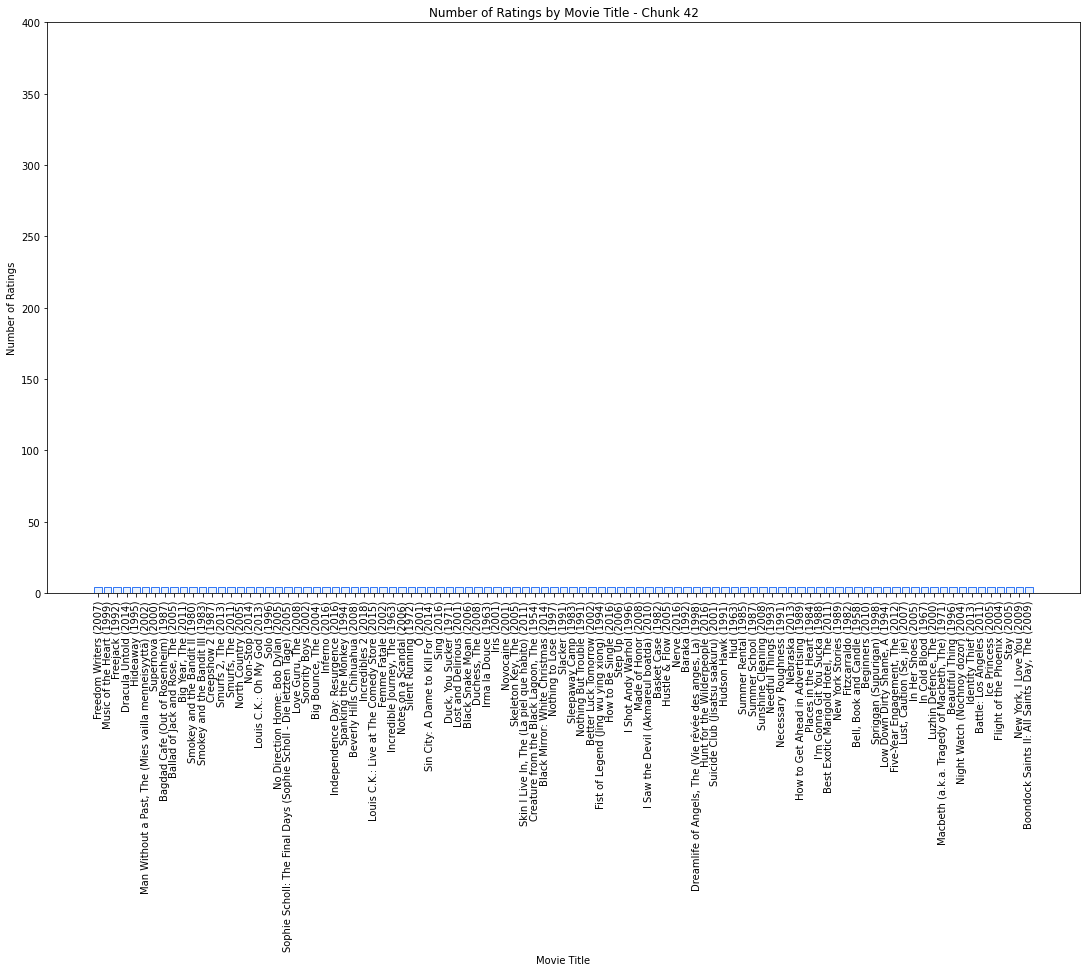

In [19]:
chunks_number = (plot_df.count()['title'] // 100) + 1
chunks = np.array_split(plot_df, chunks_number)

for i, chunk in enumerate(chunks):
    fig, ax = plt.subplots()

    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)

    plt.bar(chunk['title'], chunk['userId'], facecolor='#E9F2FE', edgecolor='#3478F5')

    plt.xticks(rotation=90)
    plt.xlabel('Movie Title', fontsize=20)
    plt.ylabel('Number of Ratings', fontsize=20)
    plt.ylim(0, 400)
    plt.title(f'Number of Ratings by Movie Title - Chunk {i+1}', fontsize=30)

    plt.show()

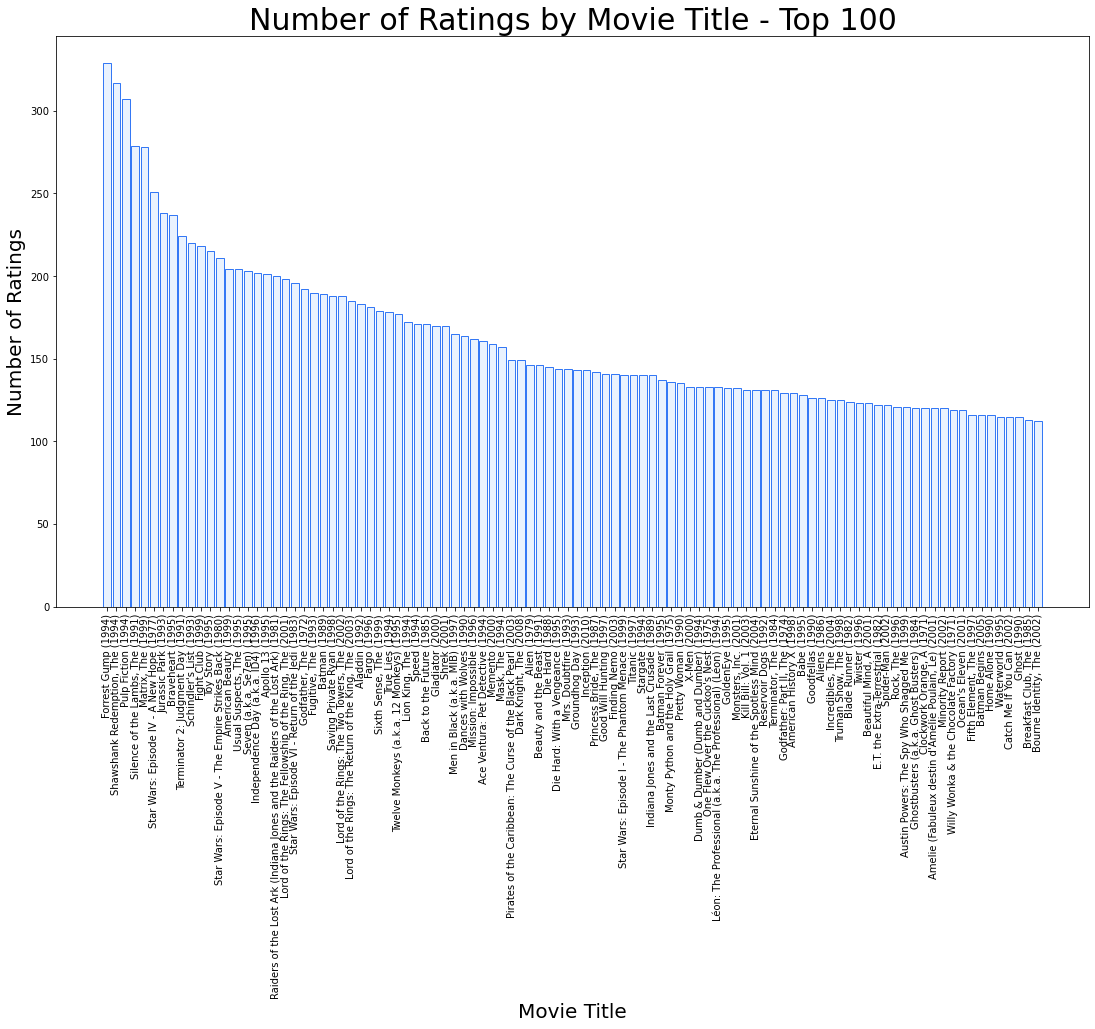

In [43]:
fig, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.bar(plot_df['title'].head(100), plot_df['userId'].head(100), facecolor='#E9F2FE', edgecolor='#3478F5')

plt.xticks(rotation=90)
plt.xlabel('Movie Title', fontsize=20)
plt.ylabel('Number of Ratings', fontsize=20)
plt.title('Number of Ratings by Movie Title - Top 100', fontsize=30)

plt.show()

The majority of the movies have fewer than 50 ratings. About 400 movies have between 50 and 100 ratings. Only a little over 100 movies have more than 100 ratings, and fewer than 50 movies have more than 150 ratings.

### Question 2

#### Question 2 • Find the nubmer of ratings

In [21]:
ratings_movies_df.groupby(by=["movieId"]).count().sum()['userId']

92394

#### Question 2 • Find the nubmer of unique movies

In [22]:
ratings_movies_df['movieId'].nunique()

4180

#### Question 2 • Find the top ten movies with the most ratings

In [23]:
ratings_movies_df.groupby(by=["movieId"])['userId'].count().reset_index().sort_values('userId', ascending=False).head(10)

movieId  userId
239       356     329
211       318     317
197       296     307
388       593     279
1397     2571     278
175       260     251
319       480     238
82        110     237
385       589     224
350       527     220

In [24]:
top_movies_df = ratings_movies_df.groupby(by=["movieId"])['userId'].count().reset_index().sort_values('userId', ascending=False).head(10)
movies_df[movies_df['movieId'].isin(top_movies_df['movieId'])]

movieId                                      title  \
97        110                          Braveheart (1995)   
224       260  Star Wars: Episode IV - A New Hope (1977)   
257       296                        Pulp Fiction (1994)   
277       318           Shawshank Redemption, The (1994)   
314       356                        Forrest Gump (1994)   
418       480                       Jurassic Park (1993)   
461       527                    Schindler's List (1993)   
507       589          Terminator 2: Judgment Day (1991)   
510       593           Silence of the Lambs, The (1991)   
1939     2571                         Matrix, The (1999)   

                                genres  
97                    Action|Drama|War  
224            Action|Adventure|Sci-Fi  
257        Comedy|Crime|Drama|Thriller  
277                        Crime|Drama  
314           Comedy|Drama|Romance|War  
418   Action|Adventure|Sci-Fi|Thriller  
461                          Drama|War  
507                      Action|Sci-Fi  
510              Crime|Horror|Thriller  
1939            Action|Sci-Fi|Thriller

#### Question 2 • Find the number of users that have rated the Forrest Gump (1994) movie

In [25]:
ratings_movies_df[ratings_movies_df['title'] == 'Forrest Gump (1994)'].groupby(by="movieId").count().reset_index()

movieId  userId  rating  timestamp  title  genres
0      356     329     329        329    329     329

Here, since we want the number of users and not the ratings, we need to make sure if we counted the userIds uniquly. Hence, we count the number of unique userIds and we reach the same results.

In [46]:
ratings_movies_df[ratings_movies_df['title'] == 'Forrest Gump (1994)'].groupby(by="movieId")['userId'].nunique().reset_index()

movieId  userId
0      356     329

### Question 3

In [26]:
ratings_movies_df[['movieId', 'userId']].groupby(by=["movieId"]).count().reset_index()

movieId  userId
0           1     215
1           2     110
2           3      52
3           4       7
4           5      49
...       ...     ...
4175   184471       4
4176   185029       4
4177   187541       4
4178   187593      12
4179   187595       5

[4180 rows x 2 columns]

In [27]:
user_ratings_movies_df = ratings_movies_df.groupby('userId')['title'].apply(list).reset_index()
user_ratings_movies_df

userId                                              title
0         1  [Toy Story (1995), Grumpier Old Men (1995), He...
1         2  [Shawshank Redemption, The (1994), Tommy Boy (...
2         3  [Dangerous Minds (1995), Schindler's List (199...
3         4  [Get Shorty (1995), Twelve Monkeys (a.k.a. 12 ...
4         5  [Toy Story (1995), Get Shorty (1995), Babe (19...
..      ...                                                ...
605     606  [Toy Story (1995), Sabrina (1995), American Pr...
606     607  [Toy Story (1995), American President, The (19...
607     608  [Toy Story (1995), Jumanji (1995), Grumpier Ol...
608     609  [Toy Story (1995), GoldenEye (1995), Bravehear...
609     610  [Toy Story (1995), Heat (1995), Casino (1995),...

[610 rows x 2 columns]

The following sections are based on the code and explanations from the mlxtend user guide. The sources are listed below: 
-  https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
-  https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/
-  https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

In [29]:
te = TransactionEncoder()
te_ary = te.fit(user_ratings_movies_df['title']).transform(user_ratings_movies_df['title'])
one_hot_movies_df = pd.DataFrame(te_ary, columns=te.columns_)
one_hot_movies_df

'burbs, The (1989)  (500) Days of Summer (2009)  \
0                 False                        False   
1                 False                        False   
2                 False                        False   
3                 False                        False   
4                 False                        False   
..                  ...                          ...   
605               False                        False   
606               False                        False   
607               False                        False   
608               False                        False   
609               False                         True   

     *batteries not included (1987)  10 (1979)  10 Cloverfield Lane (2016)  \
0                             False      False                       False   
1                             False      False                       False   
2                             False      False                       False   
3                             False      False                       False   
4                             False      False                       False   
..                              ...        ...                         ...   
605                           False      False                       False   
606                           False      False                       False   
607                           False      False                       False   
608                           False      False                       False   
609                           False      False                        True   

     10 Things I Hate About You (1999)  10,000 BC (2008)  100 Girls (2000)  \
0                                False             False             False   
1                                False             False             False   
2                                False             False             False   
3                                False             False             False   
4                                False             False             False   
..                                 ...               ...               ...   
605                              False             False             False   
606                              False             False             False   
607                              False             False             False   
608                              False             False             False   
609                              False             False             False   

     101 Dalmatians (1996)  \
0                    False   
1                    False   
2                    False   
3                    False   
4                    False   
..                     ...   
605                  False   
606                  False   
607                  False   
608                  False   
609                  False   

     101 Dalmatians (One Hundred and One Dalmatians) (1961)  ...  \
0                                                False       ...   
1                                                False       ...   
2                                                False       ...   
3                                                False       ...   
4                                                False       ...   
..                                                 ...       ...   
605                                              False       ...   
606                                              False       ...   
607                                              False       ...   
608                                              False       ...   
609                                              False       ...   

     Zombieland (2009)  Zookeeper (2011)  Zoolander (2001)  Zootopia (2016)  \
0                False             False             False            False   
1                 True             False             False            False   
2                False             False   

In [30]:
apriori_frequent_itemsets = apriori(one_hot_movies_df, min_support=0.1, use_colnames=True)
apriori_frequent_itemsets['length'] = apriori_frequent_itemsets['itemsets'].apply(lambda x: len(x))
apriori_frequent_itemsets

support                                           itemsets  length
0       0.178689                     (2001: A Space Odyssey (1968))       1
1       0.131148                                       (300 (2007))       1
2       0.121311                   (40-Year-Old Virgin, The (2005))       1
3       0.101639                                (Abyss, The (1989))       1
4       0.263934                (Ace Ventura: Pet Detective (1994))       1
...          ...                                                ...     ...
120364  0.101639  (Jurassic Park (1993), Independence Day (a.k.a...       9
120365  0.100000  (Jurassic Park (1993), Sixth Sense, The (1999)...       9
120366  0.101639  (Jurassic Park (1993), Independence Day (a.k.a...       9
120367  0.101639  (Jurassic Park (1993), Sixth Sense, The (1999)...       9
120368  0.103279  (Forrest Gump (1994), Matrix, The (1999), Lord...      10

[120369 rows x 3 columns]

#### Question 3 • apriori algorithm • min-length = 2 and min-support = 0.1

In [31]:
apriori_frequent_itemsets[ (apriori_frequent_itemsets['length'] >= 2) &
                   (apriori_frequent_itemsets['support'] >= 0.1) ]

support                                           itemsets  length
328     0.124590       (Alien (1979), 2001: A Space Odyssey (1968))       2
329     0.116393      (Aliens (1986), 2001: A Space Odyssey (1968))       2
330     0.114754  (2001: A Space Odyssey (1968), American Beauty...       2
331     0.100000  (2001: A Space Odyssey (1968), Apocalypse Now ...       2
332     0.116393  (2001: A Space Odyssey (1968), Back to the Fut...       2
...          ...                                                ...     ...
120364  0.101639  (Jurassic Park (1993), Independence Day (a.k.a...       9
120365  0.100000  (Jurassic Park (1993), Sixth Sense, The (1999)...       9
120366  0.101639  (Jurassic Park (1993), Independence Day (a.k.a...       9
120367  0.101639  (Jurassic Park (1993), Sixth Sense, The (1999)...       9
120368  0.103279  (Forrest Gump (1994), Matrix, The (1999), Lord...      10

[120041 rows x 3 columns]

#### Question 3 • apriori algorithm • min-length = 2 and min-support = 0.2

In [32]:
apriori_frequent_itemsets[ (apriori_frequent_itemsets['length'] >= 2) &
                   (apriori_frequent_itemsets['support'] >= 0.2) ]

support                                           itemsets  length
388    0.208197  (Ace Ventura: Pet Detective (1994), Forrest Gu...       2
407    0.203279  (Ace Ventura: Pet Detective (1994), Pulp Ficti...       2
457    0.201639      (Aladdin (1992), Beauty and the Beast (1991))       2
470    0.231148              (Forrest Gump (1994), Aladdin (1992))       2
485    0.213115             (Aladdin (1992), Jurassic Park (1993))       2
...         ...                                                ...     ...
51810  0.200000  (Forrest Gump (1994), Star Wars: Episode IV - ...       4
59332  0.213115  (Lord of the Rings: The Two Towers, The (2002)...       4
62424  0.200000  (Matrix, The (1999), Star Wars: Episode IV - A...       4
62945  0.221311  (Matrix, The (1999), Star Wars: Episode IV - A...       4
64334  0.200000  (Star Wars: Episode IV - A New Hope (1977), Ra...       4

[329 rows x 3 columns]

#### Question 3 • apriori algorithm • min-length = 2 and min-support = 0.3

In [33]:
apriori_frequent_itemsets[ (apriori_frequent_itemsets['length'] >= 2) &
                   (apriori_frequent_itemsets['support'] >= 0.3) ]

support                                           itemsets  length
1711  0.300000           (Forrest Gump (1994), Braveheart (1995))       2
2857  0.324590        (Forrest Gump (1994), Jurassic Park (1993))       2
2874  0.318033          (Forrest Gump (1994), Matrix, The (1999))       2
2900  0.377049         (Forrest Gump (1994), Pulp Fiction (1994))       2
2913  0.378689  (Shawshank Redemption, The (1994), Forrest Gum...       2
2917  0.326230  (Forrest Gump (1994), Silence of the Lambs, Th...       2
4402  0.300000  (Star Wars: Episode IV - A New Hope (1977), Ma...       2
4834  0.363934  (Shawshank Redemption, The (1994), Pulp Fictio...       2
4838  0.339344  (Pulp Fiction (1994), Silence of the Lambs, Th...       2
5049  0.326230  (Shawshank Redemption, The (1994), Silence of ...       2
5252  0.311475  (Star Wars: Episode IV - A New Hope (1977), St...       2

#### Question 3 • apriori algorithm • min-length = 2 and min-support = 0.5

In [34]:
apriori_frequent_itemsets[ (apriori_frequent_itemsets['length'] >= 2) &
                   (apriori_frequent_itemsets['support'] >= 0.5) ]

Empty DataFrame
Columns: [support, itemsets, length]
Index: []

A low minimum support value, such as 0.1, will produce a large number of itemsets, but many of them may not be very meaningful or useful. A high minimum support value, such as 0.5, will produce a small number of itemsets or as here nothin, and they may be too rare or specific to be of any interest. A moderate minimum support value, such as 0.2 or 0.3, can be a good choice depending on whether we prefer more or less itemsets in our analysis. For example, if we want to explore more possible patterns and associations, we can choose 0.2 as the minimum support value. If we want to focus on the most significant and frequent patterns and associations, we can choose 0.3 as the minimum support value.

#### Question 3 • fpgrowth algorithm • min-support = 0.1

In [35]:
fpgrowth(one_hot_movies_df, min_support=0.1, use_colnames=True)

support                                           itemsets
0       0.539344                              (Forrest Gump (1994))
1       0.503279                              (Pulp Fiction (1994))
2       0.457377                 (Silence of the Lambs, The (1991))
3       0.455738                               (Matrix, The (1999))
4       0.411475        (Star Wars: Episode IV - A New Hope (1977))
...          ...                                                ...
120364  0.101639  (Independence Day (a.k.a. ID4) (1996), Jerry M...
120365  0.106557  (Star Wars: Episode IV - A New Hope (1977), Je...
120366  0.104918  (Jerry Maguire (1996), Silence of the Lambs, T...
120367  0.114754        (Forrest Gump (1994), Jerry Maguire (1996))
120368  0.103279  (Jerry Maguire (1996), Star Wars: Episode VI -...

[120369 rows x 2 columns]

#### Question 3 • fpgrowth algorithm • min-support = 0.2

In [36]:
fpgrowth(one_hot_movies_df, min_support=0.2, use_colnames=True)

support                                           itemsets
0    0.539344                              (Forrest Gump (1994))
1    0.503279                              (Pulp Fiction (1994))
2    0.457377                 (Silence of the Lambs, The (1991))
3    0.455738                               (Matrix, The (1999))
4    0.411475        (Star Wars: Episode IV - A New Hope (1977))
..        ...                                                ...
408  0.216393  (Godfather, The (1972), Star Wars: Episode IV ...
409  0.216393       (Godfather, The (1972), Pulp Fiction (1994))
410  0.209836       (Godfather, The (1972), Forrest Gump (1994))
411  0.208197  (Godfather, The (1972), Silence of the Lambs, ...
412  0.204918  (Godfather, The (1972), Godfather: Part II, Th...

[413 rows x 2 columns]

#### Question 3 • fpgrowth algorithm • min-support = 0.3

In [37]:
fpgrowth(one_hot_movies_df, min_support=0.3, use_colnames=True)

support                                           itemsets
0   0.539344                              (Forrest Gump (1994))
1   0.503279                              (Pulp Fiction (1994))
2   0.457377                 (Silence of the Lambs, The (1991))
3   0.455738                               (Matrix, The (1999))
4   0.411475        (Star Wars: Episode IV - A New Hope (1977))
5   0.390164                             (Jurassic Park (1993))
6   0.388525                                (Braveheart (1995))
7   0.360656                          (Schindler's List (1993))
8   0.357377                                (Fight Club (1999))
9   0.352459                                 (Toy Story (1995))
10  0.345902  (Star Wars: Episode V - The Empire Strikes Bac...
11  0.334426                           (American Beauty (1999))
12  0.334426                       (Usual Suspects, The (1995))
13  0.332787                      (Seven (a.k.a. Se7en) (1995))
14  0.331148             (Independence Day (a.k.a. ID4) (1996))
15  0.327869  (Raiders of the Lost Ark (Indiana Jones and th...
16  0.321311  (Star Wars: Episode VI - Return of the Jedi (1...
17  0.311475                             (Fugitive, The (1993))
18  0.309836                                    (Batman (1989))
19  0.308197                       (Saving Private Ryan (1998))
20  0.519672                 (Shawshank Redemption, The (1994))
21  0.300000                                   (Aladdin (1992))
22  0.367213                (Terminator 2: Judgment Day (1991))
23  0.329508                                 (Apollo 13 (1995))
24  0.324590  (Lord of the Rings: The Fellowship of the Ring...
25  0.308197    (Lord of the Rings: The Two Towers, The (2002))
26  0.303279  (Lord of the Rings: The Return of the King, Th...
27  0.314754                            (Godfather, The (1972))
28  0.377049         (Forrest Gump (1994), Pulp Fiction (1994))
29  0.363934  (Shawshank Redemption, The (1994), Pulp Fictio...
30  0.339344  (Pulp Fiction (1994), Silence of the Lambs, Th...
31  0.326230  (Forrest Gump (1994), Silence of the Lambs, Th...
32  0.326230  (Shawshank Redemption, The (1994), Silence of ...
33  0.318033          (Forrest Gump (1994), Matrix, The (1999))
34  0.300000  (Star Wars: Episode IV - A New Hope (1977), Ma...
35  0.324590        (Forrest Gump (1994), Jurassic Park (1993))
36  0.300000           (Forrest Gump (1994), Braveheart (1995))
37  0.311475  (Star Wars: Episode IV - A New Hope (1977), St...
38  0.378689  (Shawshank Redemption, The (1994), Forrest Gum...

#### Question 3 • fpgrowth algorithm • min-support = 0.1

In [38]:
fpgrowth(one_hot_movies_df, min_support=0.5, use_colnames=True)

support                            itemsets
0  0.539344               (Forrest Gump (1994))
1  0.503279               (Pulp Fiction (1994))
2  0.519672  (Shawshank Redemption, The (1994))

### Question 4

In [49]:
fpgrowth_frequent_itemsets = fpgrowth(one_hot_movies_df, min_support=0.3, use_colnames=True)

We can alternatively use `apriori` or `fpmax`. The code for each of them is written below.

For using `apriori`:
```
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
```

For using `fpmax`:
```
frequent_itemsets = fpmax(df, min_support=0.3, use_colnames=True)
```

#### Question 4 • min-support = 0.3 and min-confidence = 0.6

In [50]:
association_rules(fpgrowth_frequent_itemsets, metric="confidence", min_threshold=0.6).sort_values('lift', ascending=False)

antecedents  \
16        (Star Wars: Episode IV - A New Hope (1977))   
17  (Star Wars: Episode V - The Empire Strikes Bac...   
11        (Star Wars: Episode IV - A New Hope (1977))   
12                               (Matrix, The (1999))   
13                              (Forrest Gump (1994))   
14                             (Jurassic Park (1993))   
4                               (Pulp Fiction (1994))   
5                  (Silence of the Lambs, The (1991))   
15                                (Braveheart (1995))   
2                  (Shawshank Redemption, The (1994))   
3                               (Pulp Fiction (1994))   
0                               (Forrest Gump (1994))   
1                               (Pulp Fiction (1994))   
8                  (Shawshank Redemption, The (1994))   
9                  (Silence of the Lambs, The (1991))   
18                 (Shawshank Redemption, The (1994))   
19                              (Forrest Gump (1994))   
7                  (Silence of the Lambs, The (1991))   
6                               (Forrest Gump (1994))   
10                               (Matrix, The (1999))   

                                          consequents  antecedent support  \
16  (Star Wars: Episode V - The Empire Strikes Bac...            0.411475   
17        (Star Wars: Episode IV - A New Hope (1977))            0.345902   
11                               (Matrix, The (1999))            0.411475   
12        (Star Wars: Episode IV - A New Hope (1977))            0.455738   
13                             (Jurassic Park (1993))            0.539344   
14                              (Forrest Gump (1994))            0.390164   
4                  (Silence of the Lambs, The (1991))            0.503279   
5                               (Pulp Fiction (1994))            0.457377   
15                              (Forrest Gump (1994))            0.388525   
2                               (Pulp Fiction (1994))            0.519672   
3                  (Shawshank Redemption, The (1994))            0.503279   
0                               (Pulp Fiction (1994))            0.539344   
1                               (Forrest Gump (1994))            0.503279   
8                  (Silence of the Lambs, The (1991))            0.519672   
9                  (Shawshank Redemption, The (1994))            0.457377   
18                              (Forrest Gump (1994))            0.519672   
19                 (Shawshank Redemption, The (1994))            0.539344   
7                               (Forrest Gump (1994))            0.457377   
6                  (Silence of the Lambs, The (1991))            0.539344   
10                              (Forrest Gump (1994))            0.455738   

    consequent support   support  confidence      lift  leverage  conviction  \
16            0.345902  0.311475    0.756972  2.188403  0.169145    2.691454   
17            0.411475  0.311475    0.900474  2.188403  0.169145    5.913271   
11            0.455738  0.300000    0.729084  1.599788  0.112475    2.008968   
12            0.411475  0.300000    0.658273  1.599788  0.112475    1.722209   
13            0.390164  0.324590    0.601824  1.542489  0.114157    1.531573   
14            0.539344  0.324590    0.831933  1.542489  0.114157    2.740902   
4             0.457377  0.339344    0.674267  1.474204  0.109156    1.665852   
5             0.503279  0.339344    0.741935  1.474204  0.109156    1.924795   
15            0.539344  0.300000    0.772152  1.431649  0.090451    2.021767   
2             0.503279  0.363934    0.700315  1.391506  0.102395    1.657481   
3             0.519672  0.363934    0.723127  1.391506  0.102395    1.734831   
0             0.503279  0.377049    0.699088  1.389068  0.105609    1.650720   
1             0.539344  0.377049    0.749186  1.389068  0.105609    1.836640   
8             0.457377  0.326230    0.627760  1.372522  0.088543    1.457724   
9             0.519672  0.

In [52]:
association_rules(fpgrowth_frequent_itemsets, metric="confidence", min_threshold=0.6).count()

antecedents           20
consequents           20
antecedent support    20
consequent support    20
support               20
confidence            20
lift                  20
leverage              20
conviction            20
zhangs_metric         20
dtype: int64

In [69]:
for _, rule in association_rules(fpgrowth_frequent_itemsets, metric="confidence", min_threshold=0.6).sort_values('lift', ascending=False).head(3).iterrows():
    print(f"\nRule: {rule['antecedents']} → {rule['consequents']} - lift: {rule['lift']}")


Rule: frozenset({'Star Wars: Episode IV - A New Hope (1977)'}) → frozenset({'Star Wars: Episode V - The Empire Strikes Back (1980)'}) - lift: 2.18840278695644

Rule: frozenset({'Star Wars: Episode V - The Empire Strikes Back (1980)'}) → frozenset({'Star Wars: Episode IV - A New Hope (1977)'}) - lift: 2.18840278695644

Rule: frozenset({'Star Wars: Episode IV - A New Hope (1977)'}) → frozenset({'Matrix, The (1999)'}) - lift: 1.5997878987646537


#### Question 4 • min-support = 0.3 and min-confidence = 0.8

Mine all association rules with min-support=0.3 and min-confidence=0.8 and mention the number of minned rules. How did the number of rules change compared to the previous state? Explain the reason for this change.

In [51]:
association_rules(fpgrowth_frequent_itemsets, metric="confidence", min_threshold=0.8).sort_values('lift', ascending=False)

antecedents  \
1  (Star Wars: Episode V - The Empire Strikes Bac...   
0                             (Jurassic Park (1993))   

                                   consequents  antecedent support  \
1  (Star Wars: Episode IV - A New Hope (1977))            0.345902   
0                        (Forrest Gump (1994))            0.390164   

   consequent support   support  confidence      lift  leverage  conviction  \
1            0.411475  0.311475    0.900474  2.188403  0.169145    5.913271   
0            0.539344  0.324590    0.831933  1.542489  0.114157    2.740902   

   zhangs_metric  
1       0.830220  
0       0.576708

In [53]:
association_rules(fpgrowth_frequent_itemsets, metric="confidence", min_threshold=0.8).count()

antecedents           2
consequents           2
antecedent support    2
consequent support    2
support               2
confidence            2
lift                  2
leverage              2
conviction            2
zhangs_metric         2
dtype: int64

As expected, the number of rules drops significantly. There were 20 rules in the previous state, but only 2 in this one. This is because a higher threshold means a stricter criterion for finding (more interesting) association rules. Only the rules that have a high confidence level will be considered interesting.